In [10]:
import pandas as pd
import numpy as np
import requests
import os
from dotenv import load_dotenv
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

load_dotenv()

True

In [30]:
API_KEY = os.getenv('ODDS_API_KEY')
BASE_URL = os.getenv('ODDS_API_BASE_URL')

league_index = 1

In [31]:
odds_api_get_sports = f'{BASE_URL}/v4/sports/?apiKey={API_KEY}'

r = requests.get(odds_api_get_sports)

In [32]:
sport_keys = []
for sport in r.json():
    
    print(sport['key'])
    sport_keys.append(sport['key'])

americanfootball_cfl
americanfootball_ncaaf
americanfootball_ncaaf_championship_winner
americanfootball_nfl
americanfootball_nfl_super_bowl_winner
aussierules_afl
baseball_kbo
baseball_milb
baseball_mlb
baseball_mlb_world_series_winner
baseball_npb
basketball_nba
basketball_nba_championship_winner
basketball_ncaab_championship_winner
basketball_wnba
boxing_boxing
cricket_caribbean_premier_league
cricket_international_t20
cricket_odi
cricket_t20_blast
golf_masters_tournament_winner
icehockey_nhl
icehockey_nhl_championship_winner
icehockey_sweden_allsvenskan
icehockey_sweden_hockey_league
lacrosse_pll
mma_mixed_martial_arts
politics_us_presidential_election_winner
rugbyleague_nrl
soccer_argentina_primera_division
soccer_austria_bundesliga
soccer_brazil_campeonato
soccer_brazil_serie_b
soccer_chile_campeonato
soccer_china_superleague
soccer_conmebol_copa_libertadores
soccer_conmebol_copa_sudamericana
soccer_denmark_superliga
soccer_efl_champ
soccer_england_league1
soccer_england_league2
s

In [33]:
t_sport_keys = [sk for sk in sport_keys if sk.startswith('americanfootball')]
t_sport_keys = [sk for sk in t_sport_keys if 'nfl' in sk or 'ncaaf' in sk]
t_sport_keys = [sk for sk in t_sport_keys if 'winner' not in sk]
t_sport_keys

['americanfootball_ncaaf', 'americanfootball_nfl']

In [34]:
odds_api_get_odds = f'{BASE_URL}/v4/sports/{t_sport_keys[league_index]}/odds/?apiKey={API_KEY}&regions=us,us2&markets=h2h,spreads,totals'
odds_api_get_odds

'https://api.the-odds-api.com/v4/sports/americanfootball_nfl/odds/?apiKey=b746bcb6c719ae89993ad14f5b8f1114&regions=us,us2&markets=h2h,spreads,totals'

In [35]:
r2 = requests.get(odds_api_get_odds)

r2.json()

[{'id': 'f1bc532dff946d15cb85654b5c4b246e',
  'sport_key': 'americanfootball_nfl',
  'sport_title': 'NFL',
  'commence_time': '2025-09-05T00:20:00Z',
  'home_team': 'Philadelphia Eagles',
  'away_team': 'Dallas Cowboys',
  'bookmakers': [{'key': 'draftkings',
    'title': 'DraftKings',
    'last_update': '2025-09-02T16:05:40Z',
    'markets': [{'key': 'h2h',
      'last_update': '2025-09-02T16:05:39Z',
      'outcomes': [{'name': 'Dallas Cowboys', 'price': 4.1},
       {'name': 'Philadelphia Eagles', 'price': 1.25}]},
     {'key': 'spreads',
      'last_update': '2025-09-02T16:05:39Z',
      'outcomes': [{'name': 'Dallas Cowboys', 'price': 1.87, 'point': 8.5},
       {'name': 'Philadelphia Eagles', 'price': 1.95, 'point': -8.5}]},
     {'key': 'totals',
      'last_update': '2025-09-02T16:05:39Z',
      'outcomes': [{'name': 'Over', 'price': 1.91, 'point': 47.5},
       {'name': 'Under', 'price': 1.91, 'point': 47.5}]}]},
   {'key': 'ballybet',
    'title': 'Bally Bet',
    'last_updat

In [36]:
for card in r2.json():
    print(card)
    print('========================')

{'id': 'f1bc532dff946d15cb85654b5c4b246e', 'sport_key': 'americanfootball_nfl', 'sport_title': 'NFL', 'commence_time': '2025-09-05T00:20:00Z', 'home_team': 'Philadelphia Eagles', 'away_team': 'Dallas Cowboys', 'bookmakers': [{'key': 'draftkings', 'title': 'DraftKings', 'last_update': '2025-09-02T16:05:40Z', 'markets': [{'key': 'h2h', 'last_update': '2025-09-02T16:05:39Z', 'outcomes': [{'name': 'Dallas Cowboys', 'price': 4.1}, {'name': 'Philadelphia Eagles', 'price': 1.25}]}, {'key': 'spreads', 'last_update': '2025-09-02T16:05:39Z', 'outcomes': [{'name': 'Dallas Cowboys', 'price': 1.87, 'point': 8.5}, {'name': 'Philadelphia Eagles', 'price': 1.95, 'point': -8.5}]}, {'key': 'totals', 'last_update': '2025-09-02T16:05:39Z', 'outcomes': [{'name': 'Over', 'price': 1.91, 'point': 47.5}, {'name': 'Under', 'price': 1.91, 'point': 47.5}]}]}, {'key': 'ballybet', 'title': 'Bally Bet', 'last_update': '2025-09-02T16:05:41Z', 'markets': [{'key': 'h2h', 'last_update': '2025-09-02T16:05:41Z', 'outcomes

In [70]:
today_str = datetime.today().strftime('%Y-%m-%d')

r2_text = json.dumps(r2.json())
with open(f'./odds_data/{today_str}_{t_sport_keys[league_index]}_odds.txt','w') as outfile:
    outfile.write(r2_text)

In [96]:
data = r2.json()

In [97]:
rows = []
for event in data:
    for bookmaker in event["bookmakers"]:
        for market in bookmaker["markets"]:
            market_send = ''
            team_send = ''
            
            for outcome in market["outcomes"]:
                if market["key"] == "h2h":
                    market_send = "h2h"
                    team_send = outcome["name"]
                elif market["key"] in ["totals", "spreads"]:
                    market_send = market["key"]
                    team_send = f'{outcome["name"]} {outcome["point"]}'
                rows.append({
                    "game": f"{event['home_team']} vs {event['away_team']}",
                    "commence_time": event["commence_time"],
                    "bookmaker": bookmaker["title"],
                    "team": team_send,
                    "decimal_odds": outcome["price"],
                    "implied_prob": 1.0 / float(outcome["price"]),
                    "market": market_send,
                })
            

df = pd.DataFrame(rows)
df['commence_time'] = pd.to_datetime(df['commence_time'])
print(df.head(10))

                                    game             commence_time  \
0  Philadelphia Eagles vs Dallas Cowboys 2025-09-05 00:20:00+00:00   
1  Philadelphia Eagles vs Dallas Cowboys 2025-09-05 00:20:00+00:00   
2  Philadelphia Eagles vs Dallas Cowboys 2025-09-05 00:20:00+00:00   
3  Philadelphia Eagles vs Dallas Cowboys 2025-09-05 00:20:00+00:00   
4  Philadelphia Eagles vs Dallas Cowboys 2025-09-05 00:20:00+00:00   
5  Philadelphia Eagles vs Dallas Cowboys 2025-09-05 00:20:00+00:00   
6  Philadelphia Eagles vs Dallas Cowboys 2025-09-05 00:20:00+00:00   
7  Philadelphia Eagles vs Dallas Cowboys 2025-09-05 00:20:00+00:00   
8  Philadelphia Eagles vs Dallas Cowboys 2025-09-05 00:20:00+00:00   
9  Philadelphia Eagles vs Dallas Cowboys 2025-09-05 00:20:00+00:00   

    bookmaker                      team  decimal_odds  implied_prob   market  
0  DraftKings            Dallas Cowboys          4.10      0.243902      h2h  
1  DraftKings       Philadelphia Eagles          1.25      0.800000    

In [98]:
df_old = df.copy()
# current date (UTC) + 8 days
cutoff = pd.Timestamp.now(tz="UTC") + pd.Timedelta(days=8)
df = df.loc[df['commence_time'] <= cutoff].reset_index(drop=True)

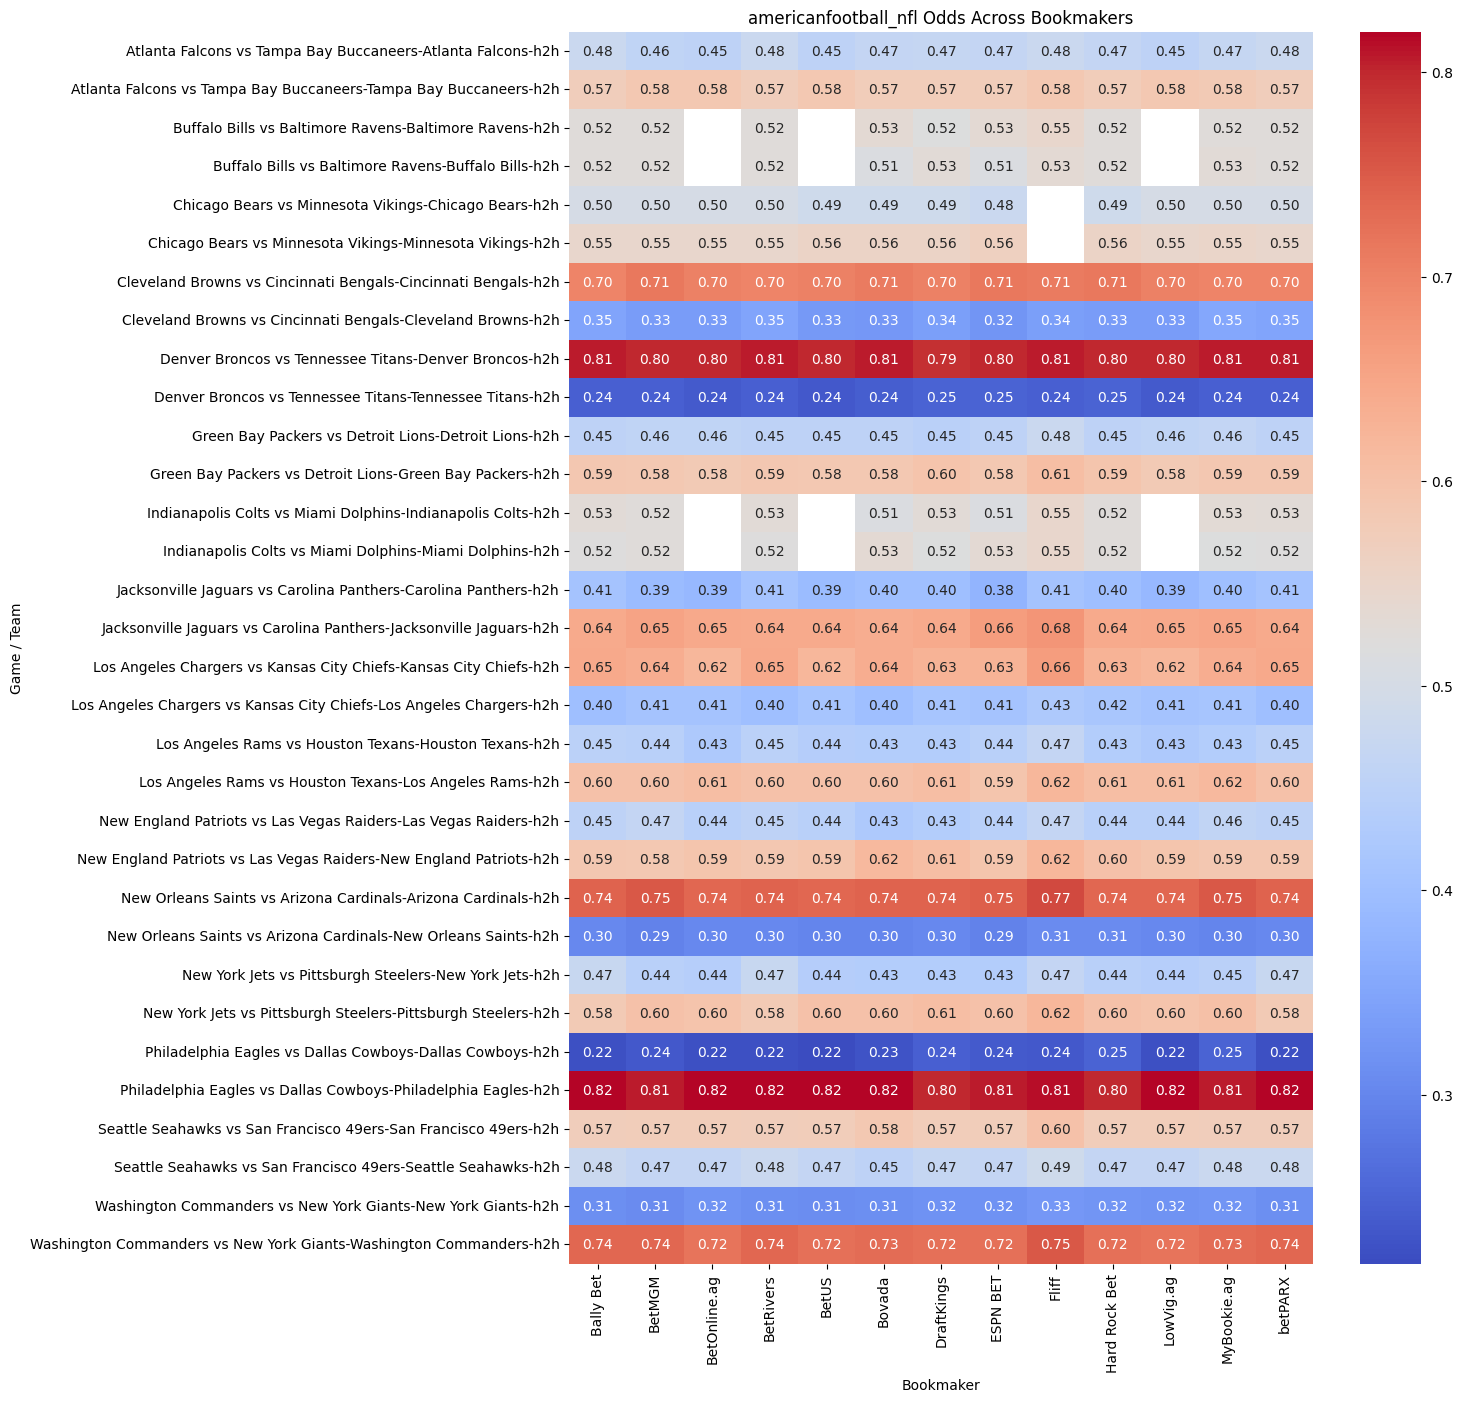

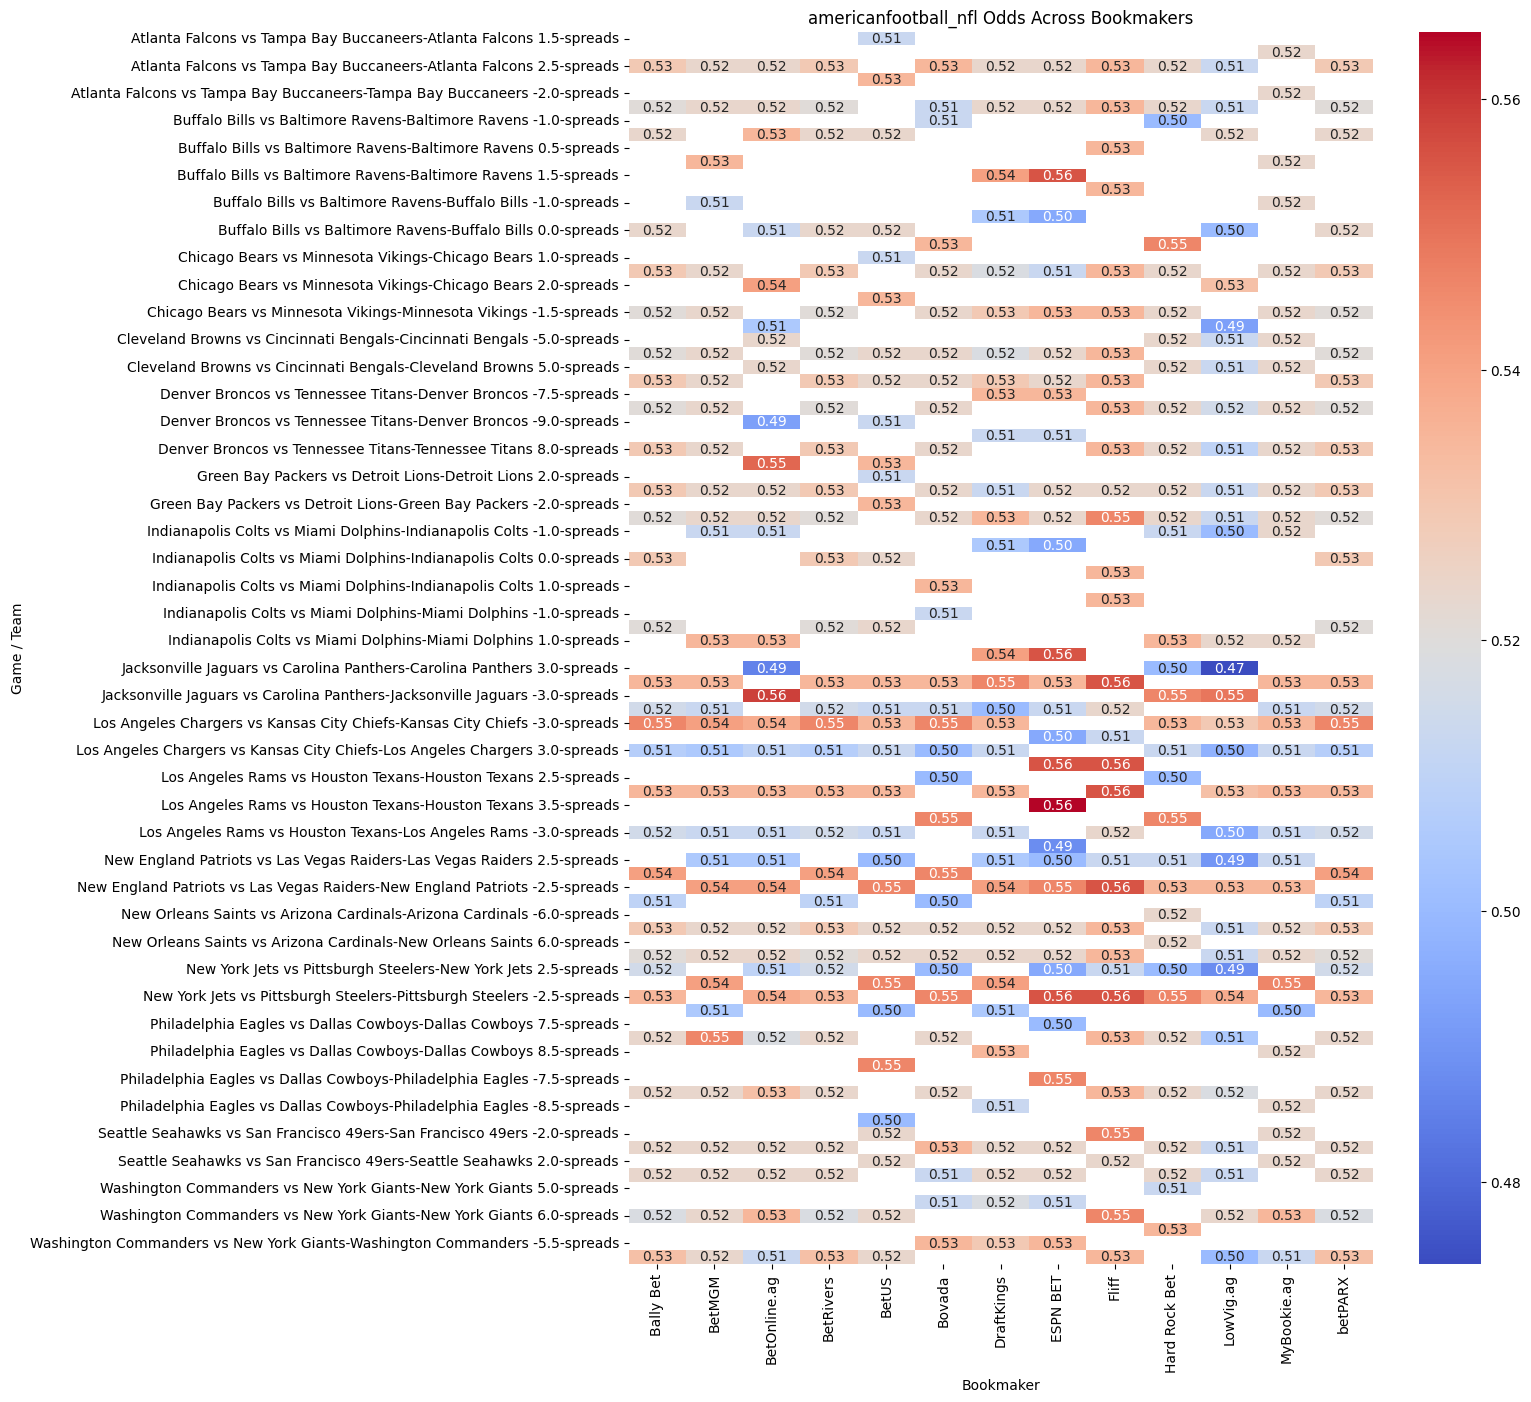

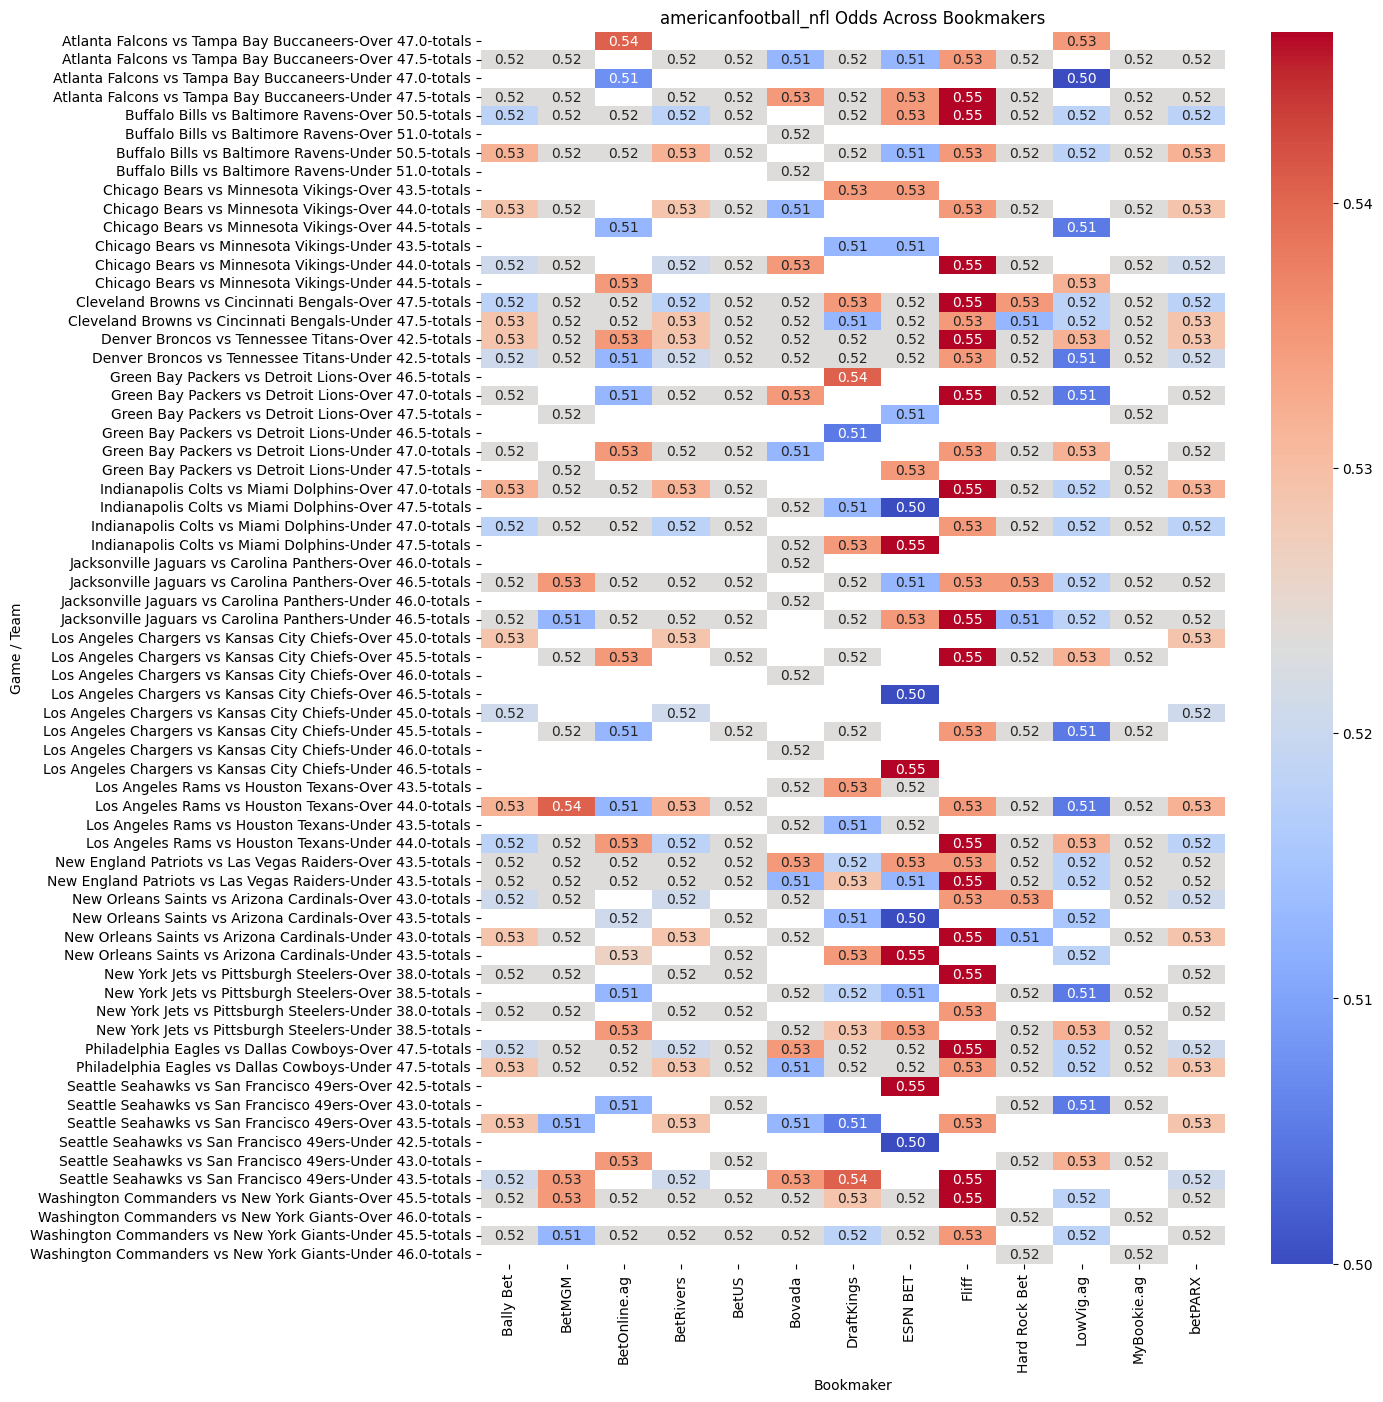

In [115]:
# Pivot so teams are rows and bookmakers are columns
for m in df['market'].unique():
    sub_df = df.loc[df['market']==m]
    pivot_df = sub_df.pivot_table(
        index=["game", "team", "market"],
        columns="bookmaker",
        values="implied_prob"
    )

    plt.figure(figsize=(12,16))
    sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{t_sport_keys[league_index]} Odds Across Bookmakers")
    plt.ylabel("Game / Team")
    plt.xlabel("Bookmaker")
    plt.show()


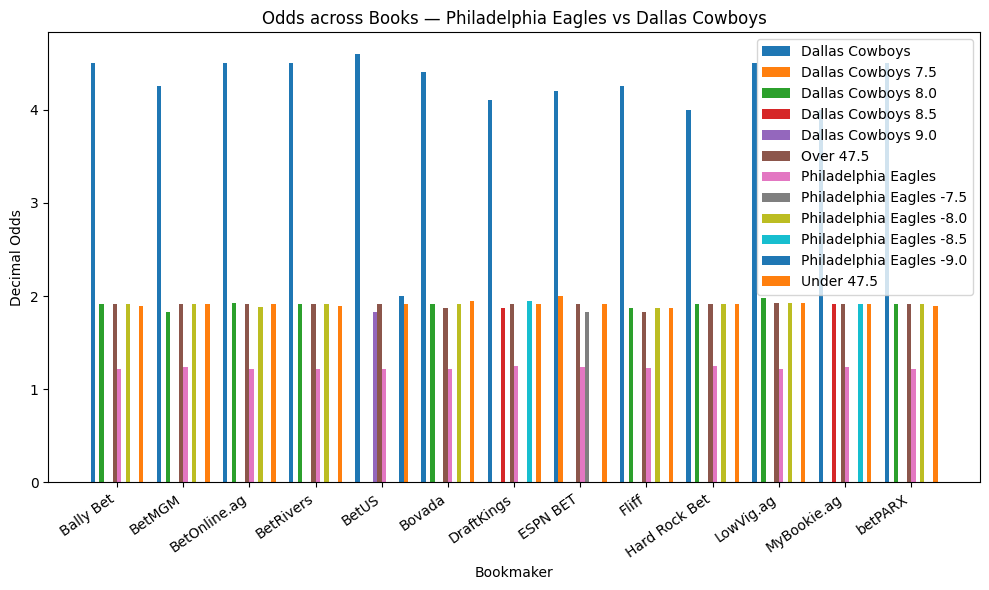

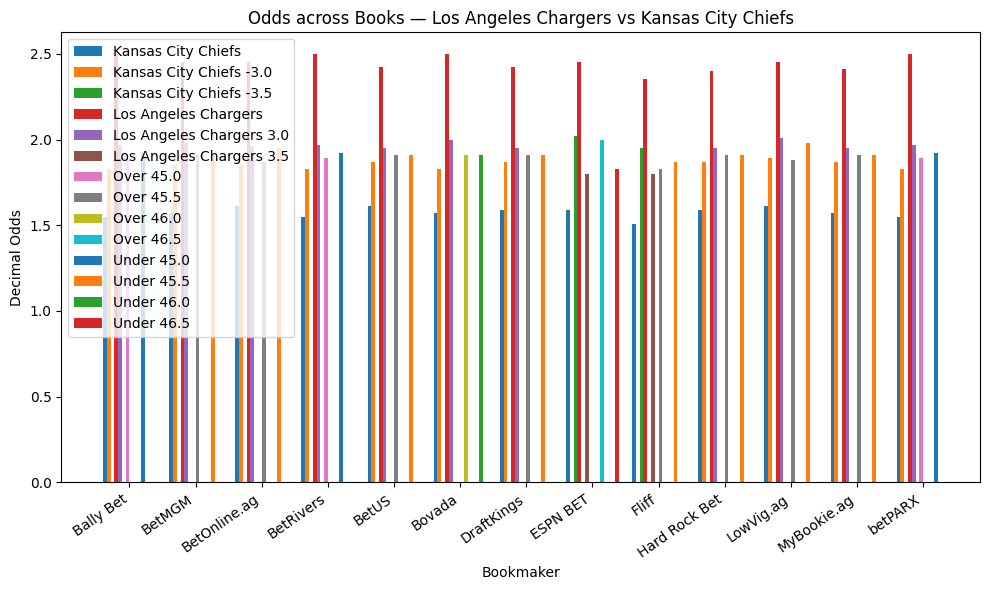

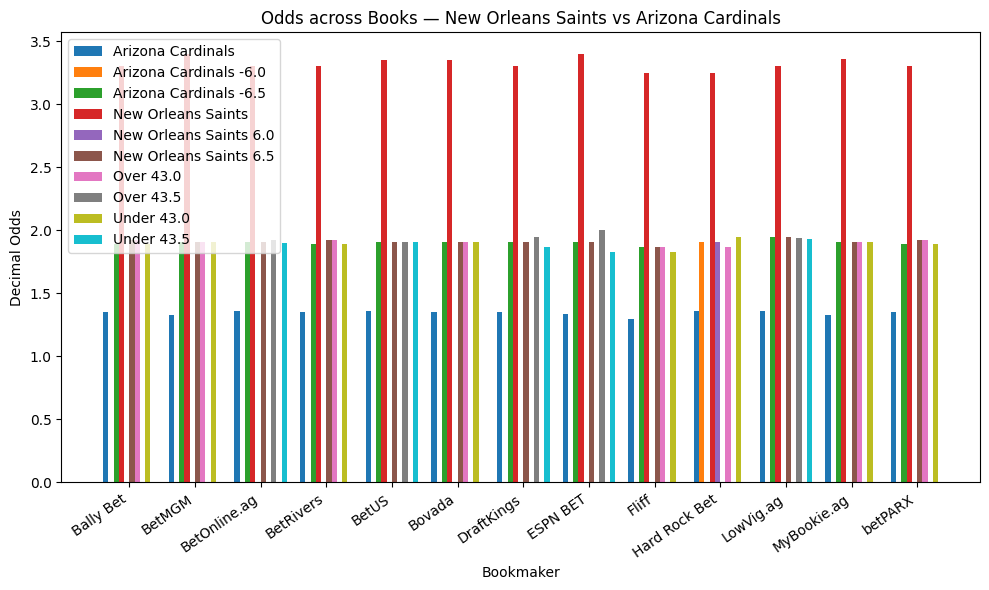

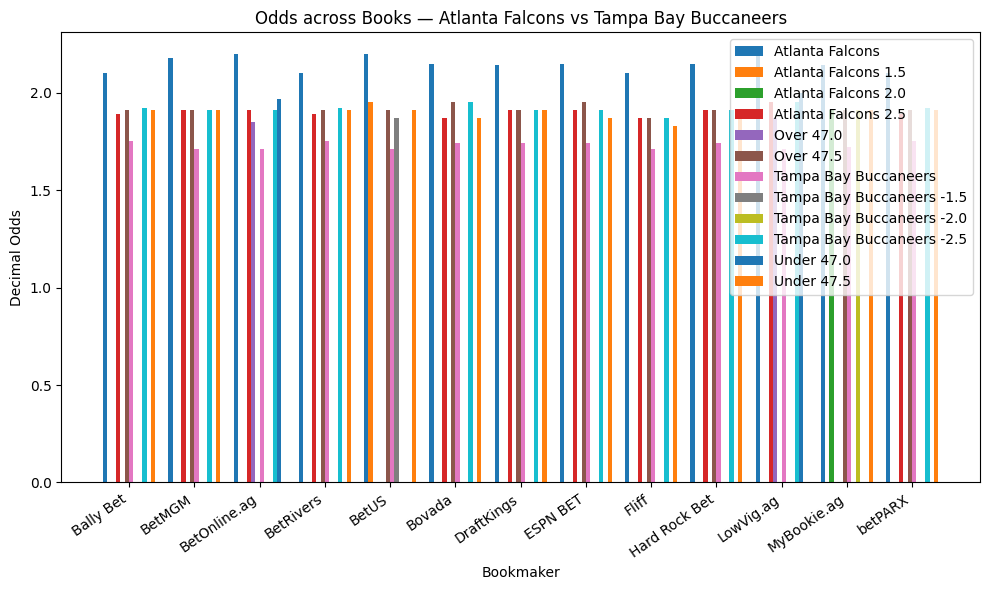

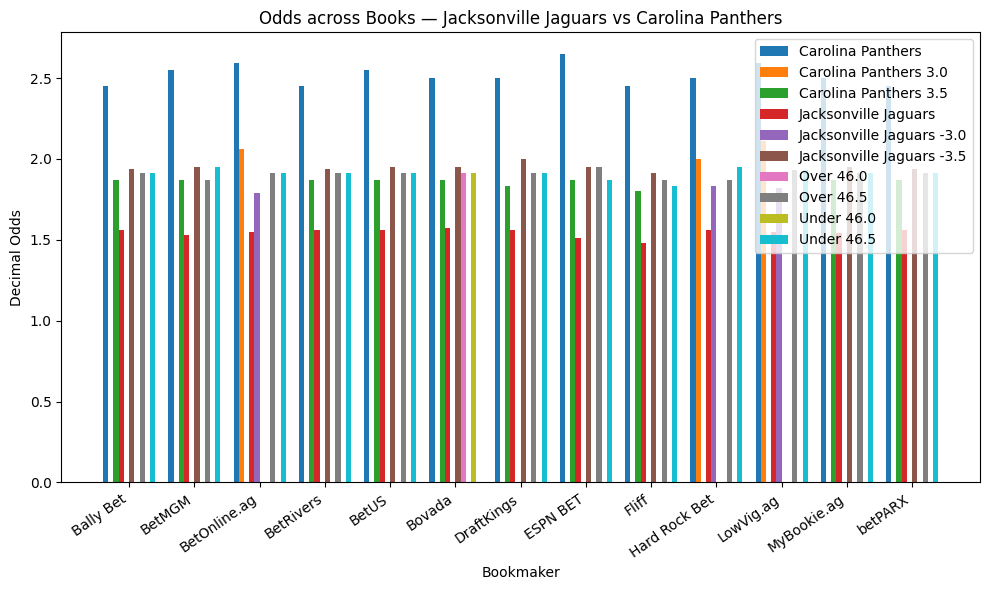

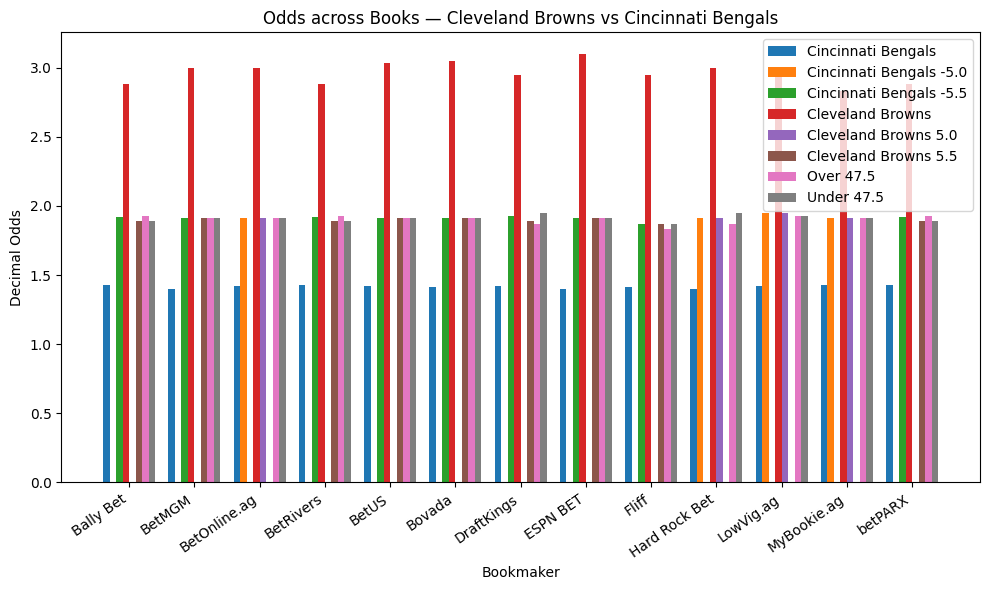

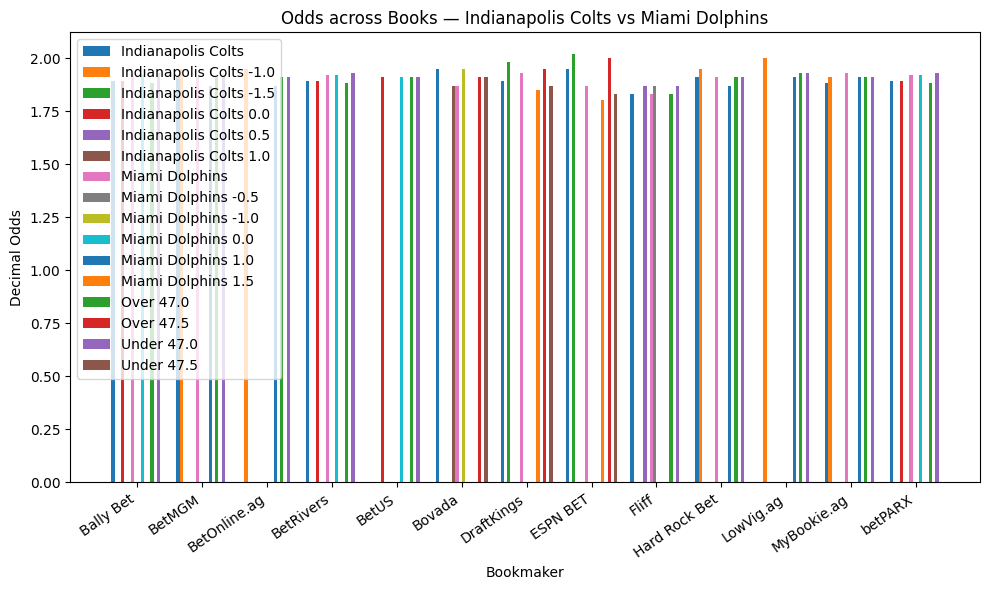

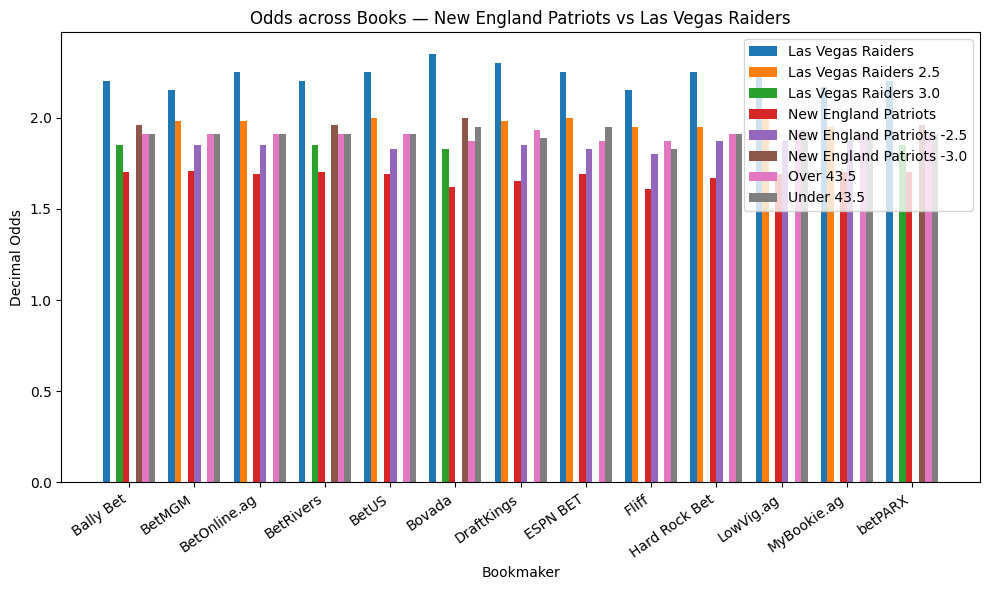

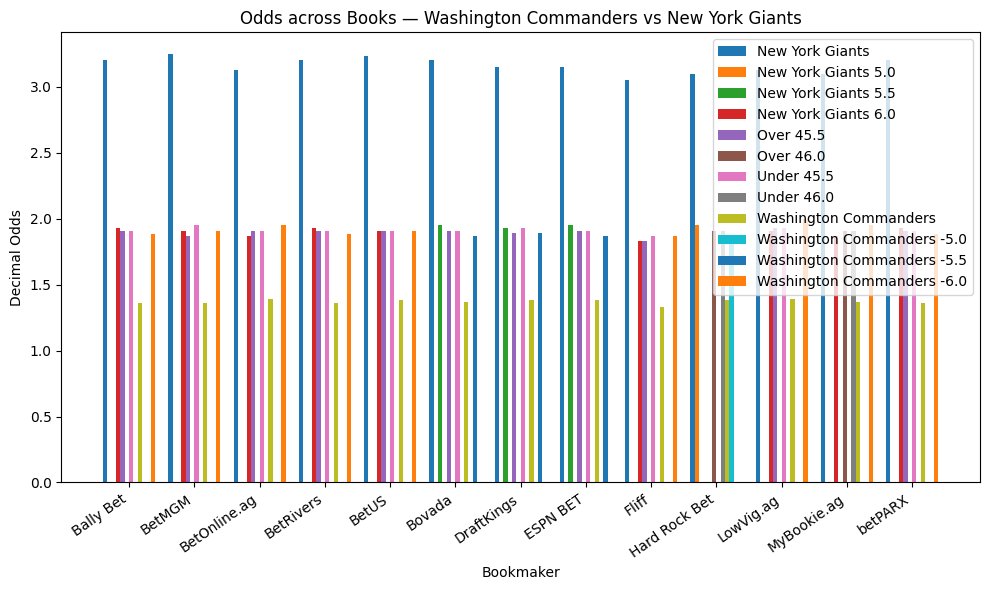

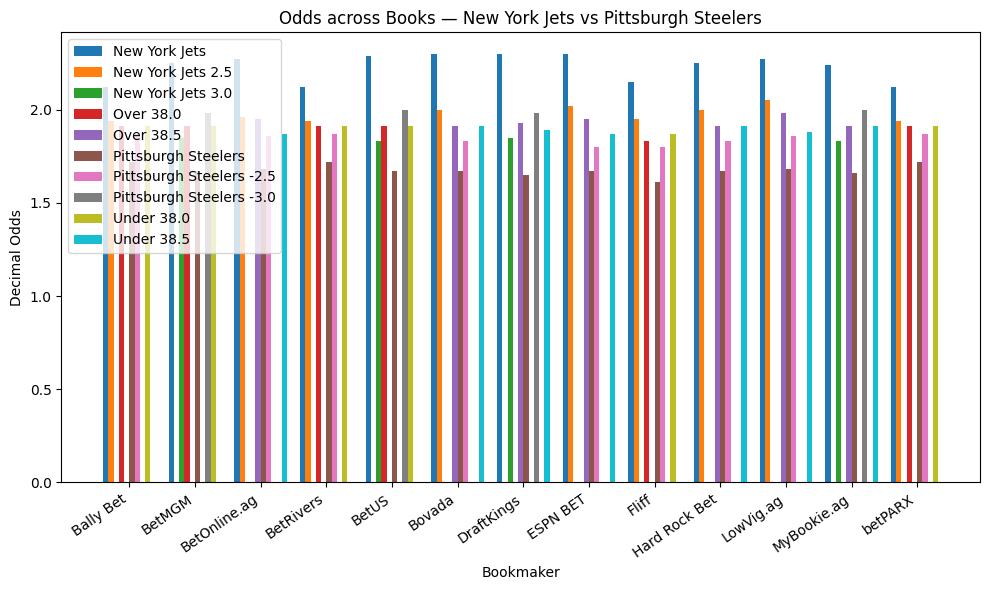

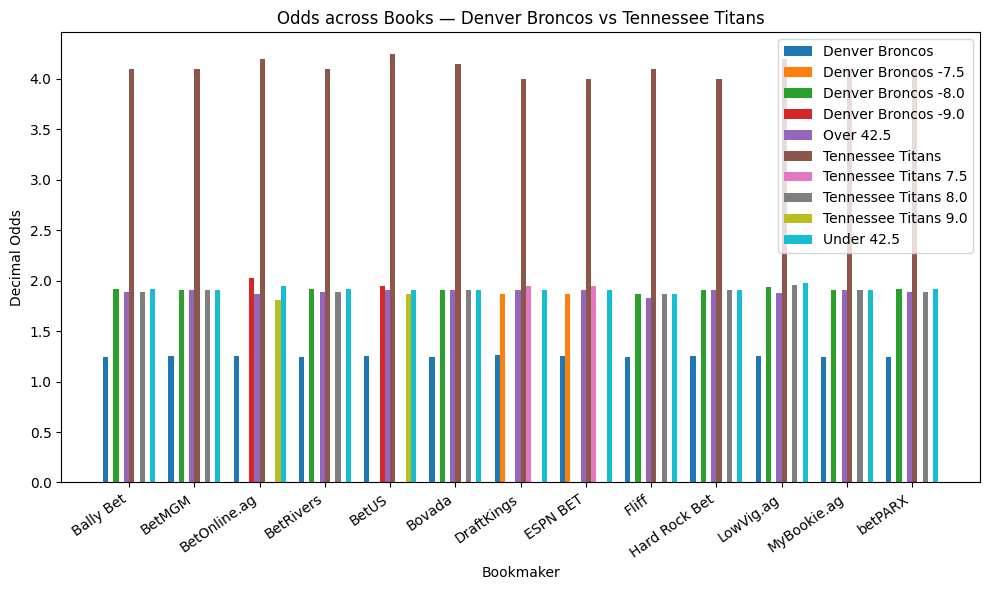

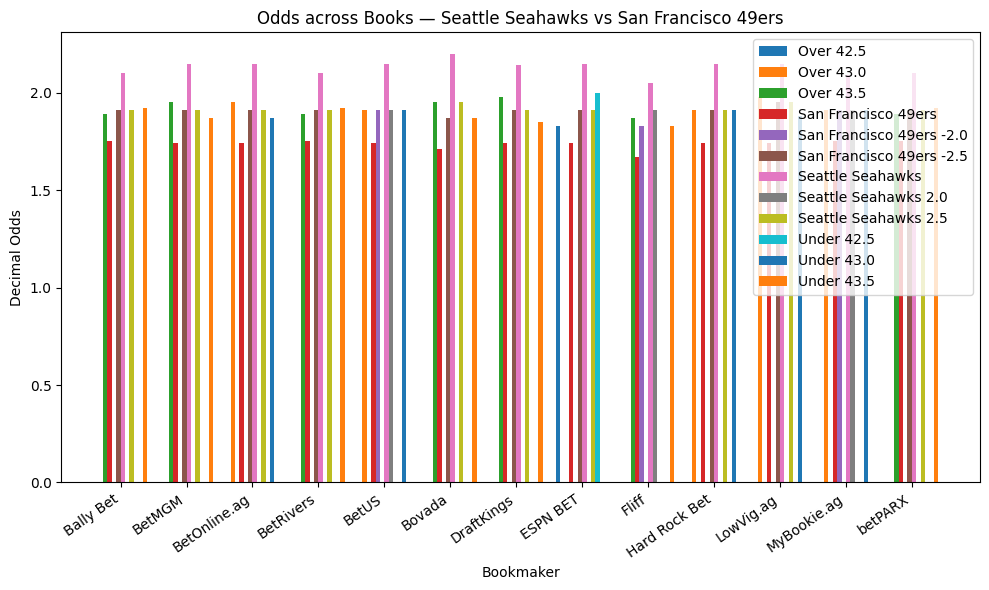

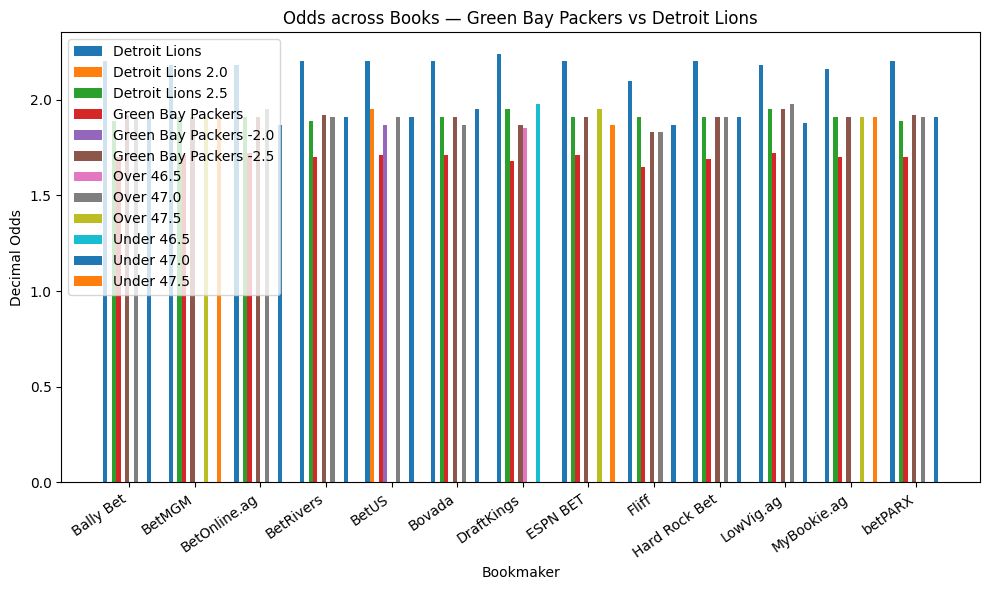

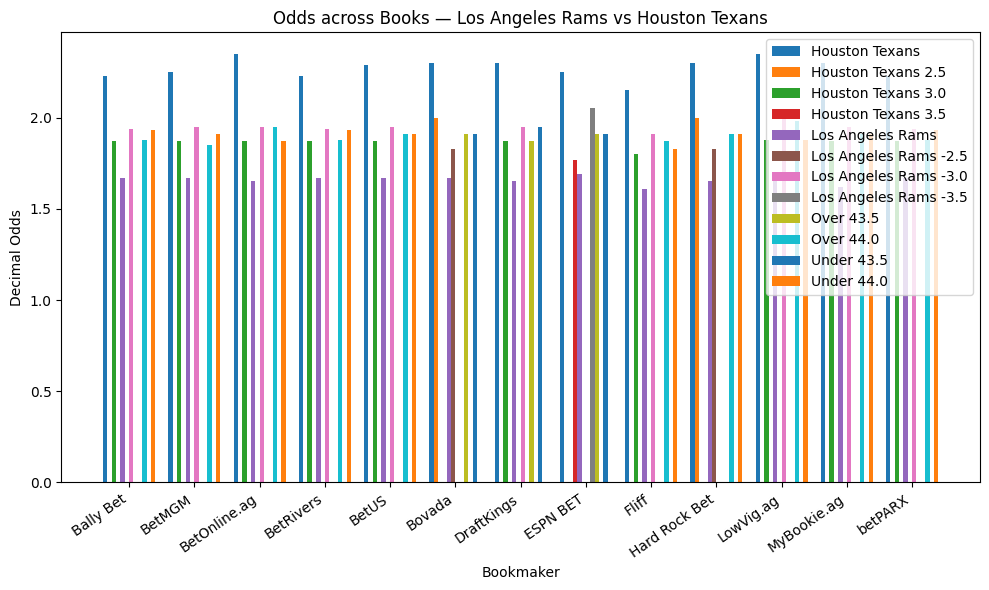

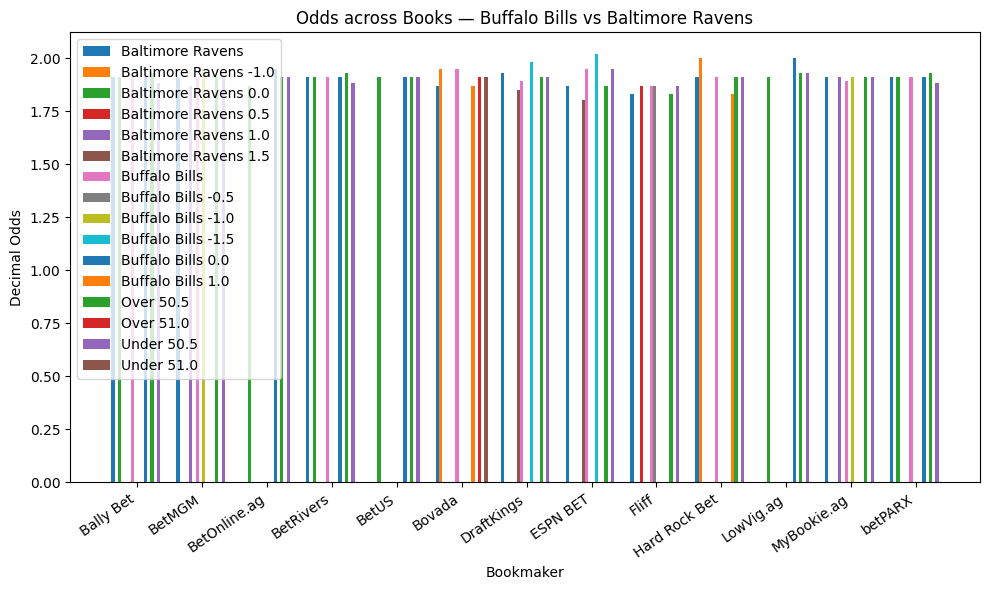

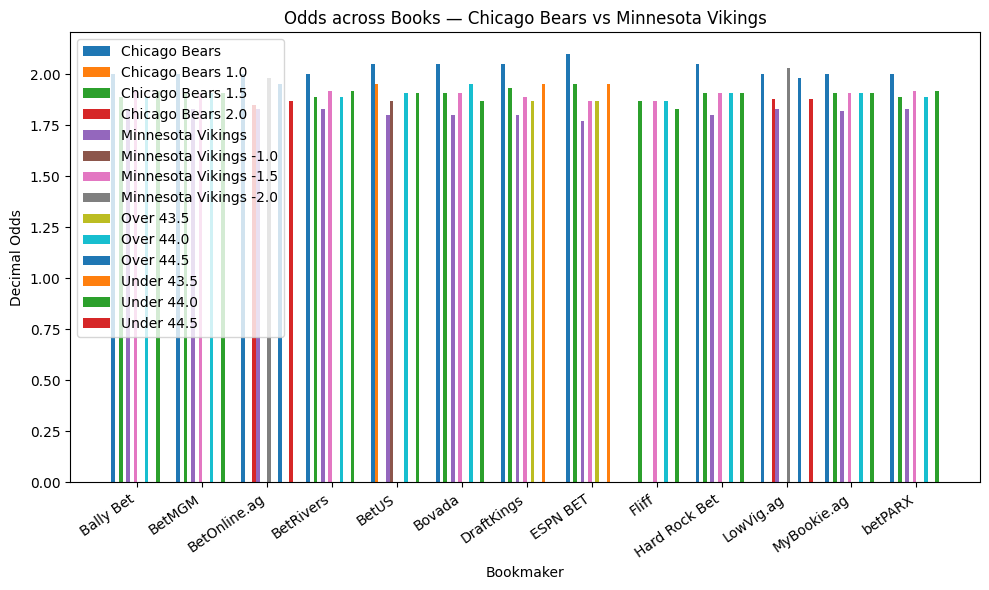

In [100]:
# 2) Fix the earlier bar plotting issue by pivoting (prevents overwrites)
#    -> one grouped bar chart per game, all games automatically
def plot_all_games_grouped(df: pd.DataFrame, value_col: str = "decimal_odds"):
    games = df["game"].unique()
    for game in games:
        sub = df[df["game"] == game].copy()
        # pivot: rows=team, cols=bookmaker
        pivot = sub.pivot_table(index="team", columns="bookmaker", values=value_col, aggfunc="mean")
        # consistent bookmaker order
        bookmakers = list(pivot.columns)
        teams = list(pivot.index)

        # grouped bars: x = bookmakers, 2 bars (or more) per bookmaker, one per team
        x = np.arange(len(bookmakers))
        width = 0.8 / max(2, len(teams))  # spread bars across each bookmaker

        plt.figure(figsize=(10, 6))
        for i, team in enumerate(teams):
            y = pivot.loc[team, bookmakers].values.astype(float)
            plt.bar(x + (i - (len(teams)-1)/2)*width, y, width=width, label=team)

        yl = "Decimal Odds" if value_col == "decimal_odds" else "Implied Probability"
        plt.title(f"Odds across Books — {game}")
        plt.xlabel("Bookmaker")
        plt.ylabel(yl)
        plt.xticks(x, bookmakers, rotation=35, ha="right")
        plt.legend()
        plt.tight_layout()
        plt.show()

# Example: decimal odds charts for all games
plot_all_games_grouped(df, value_col="decimal_odds")


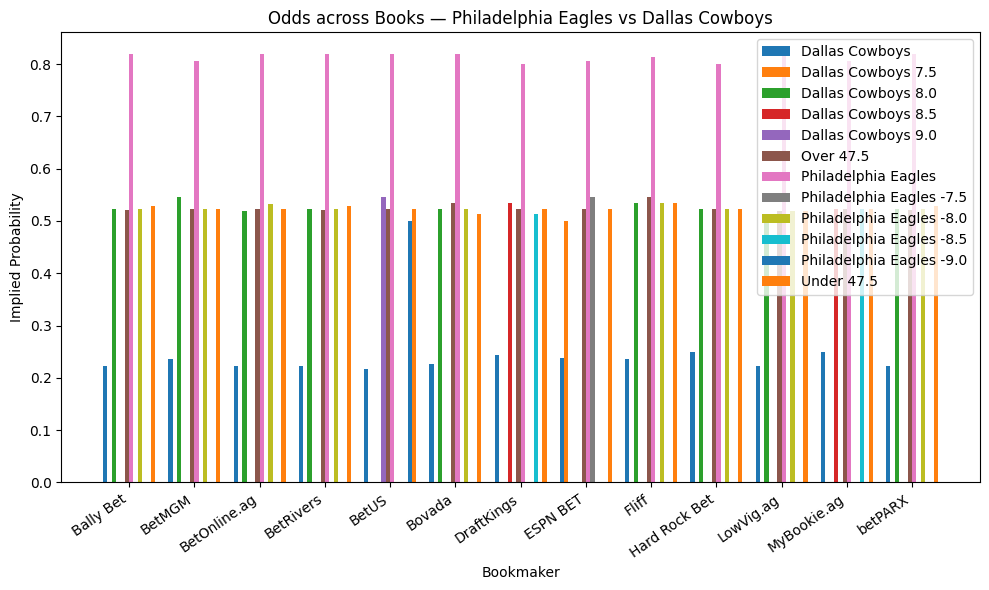

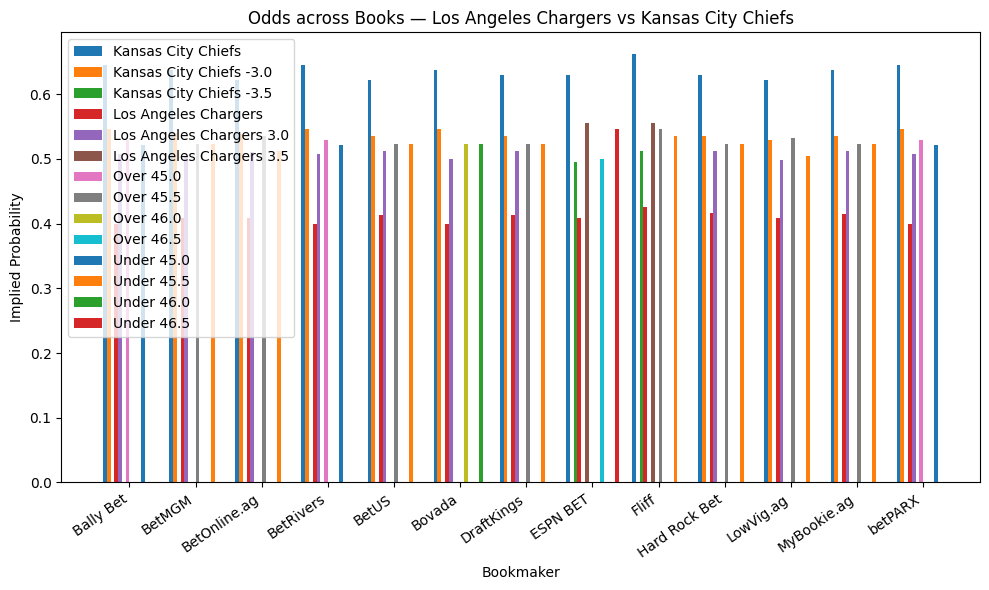

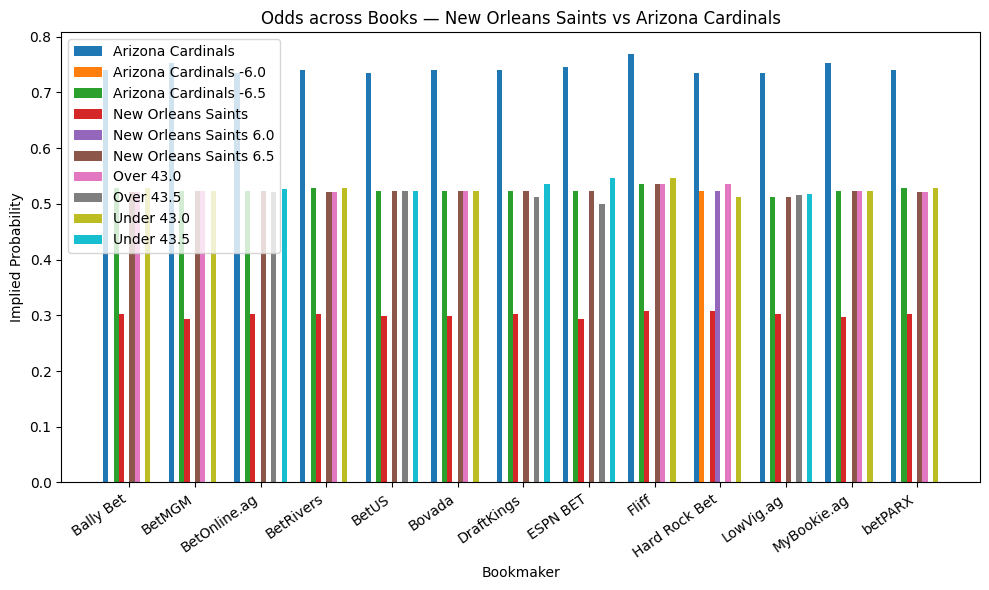

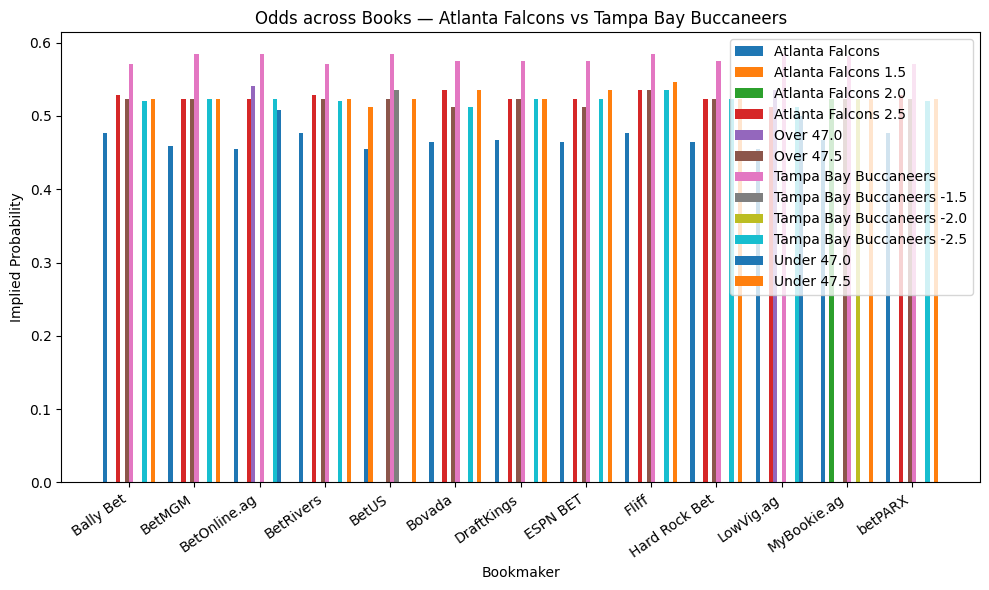

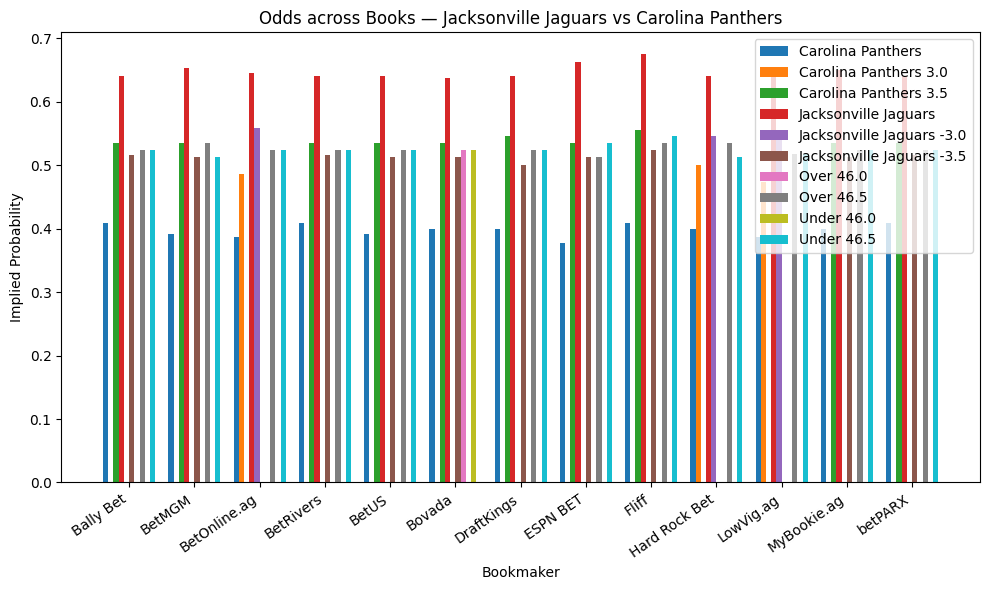

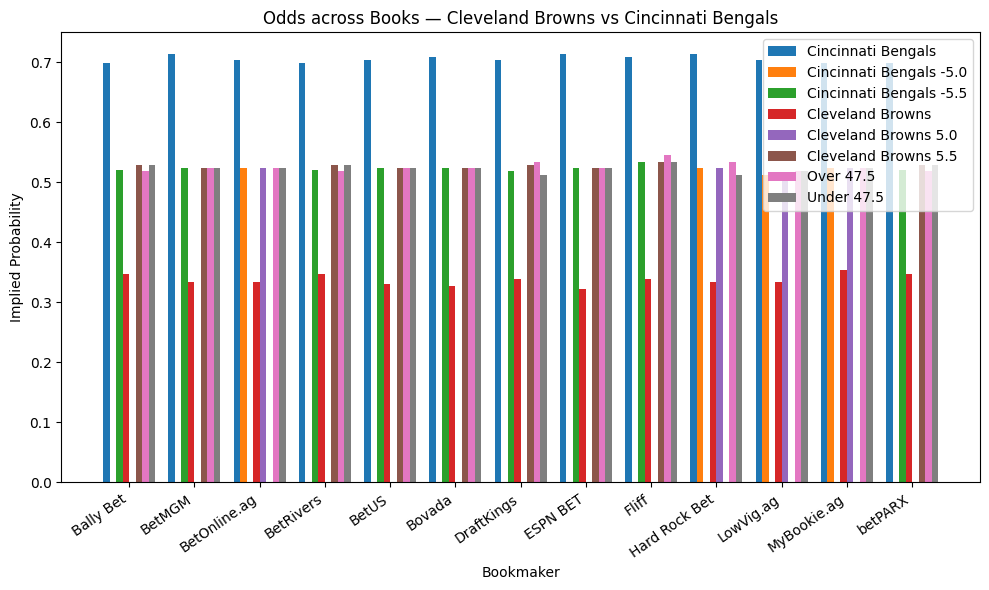

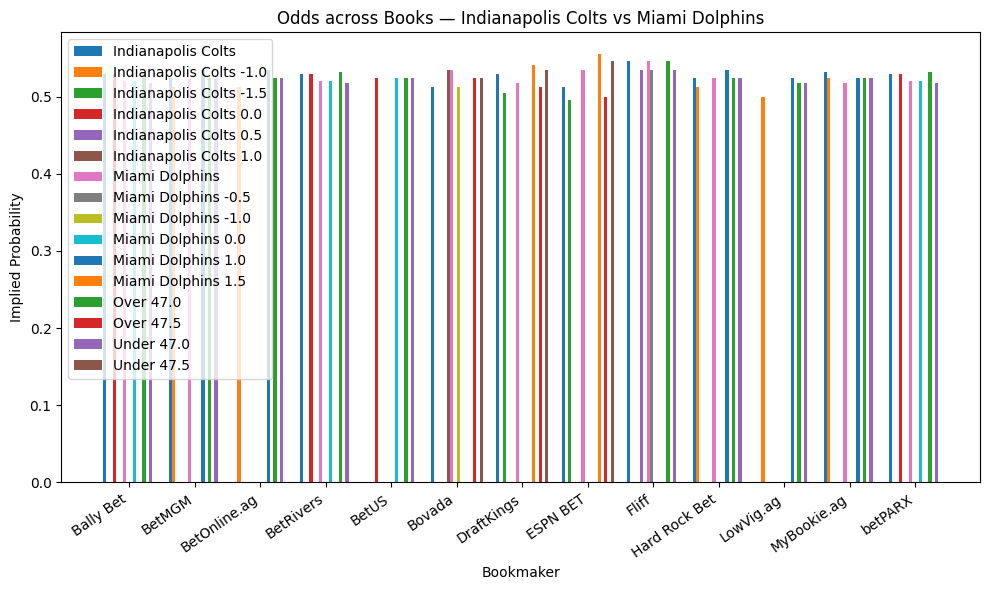

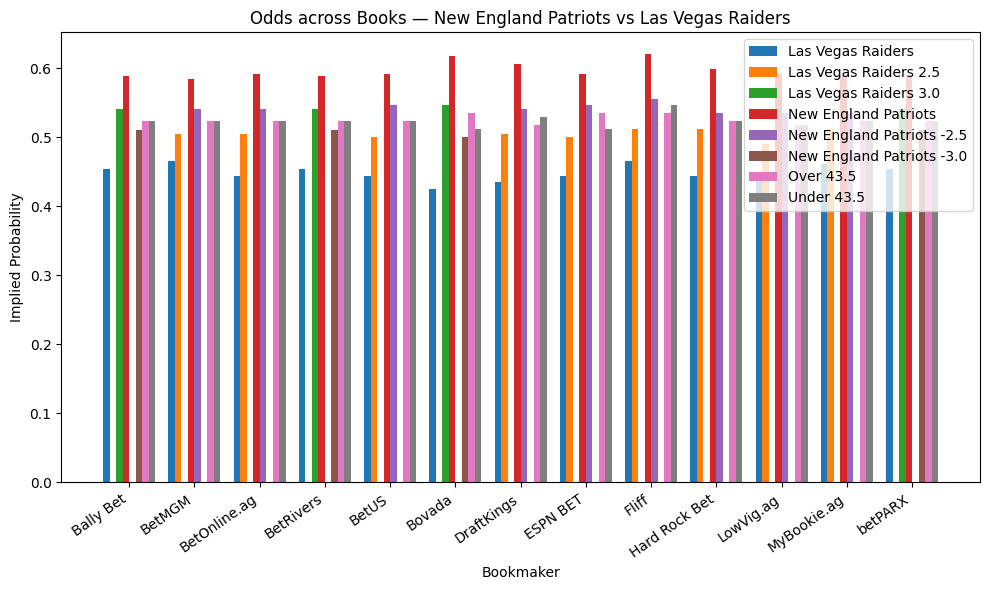

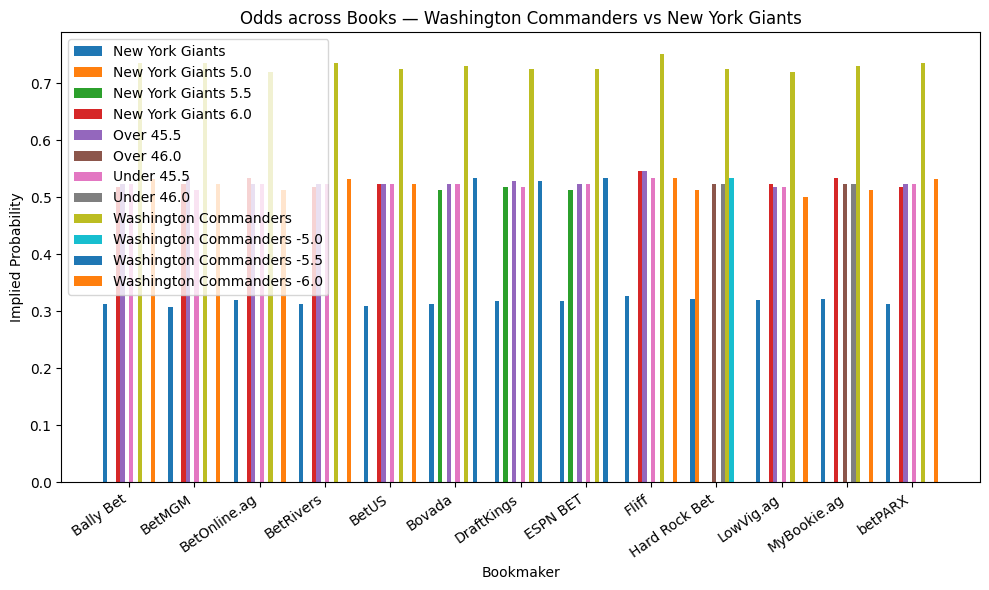

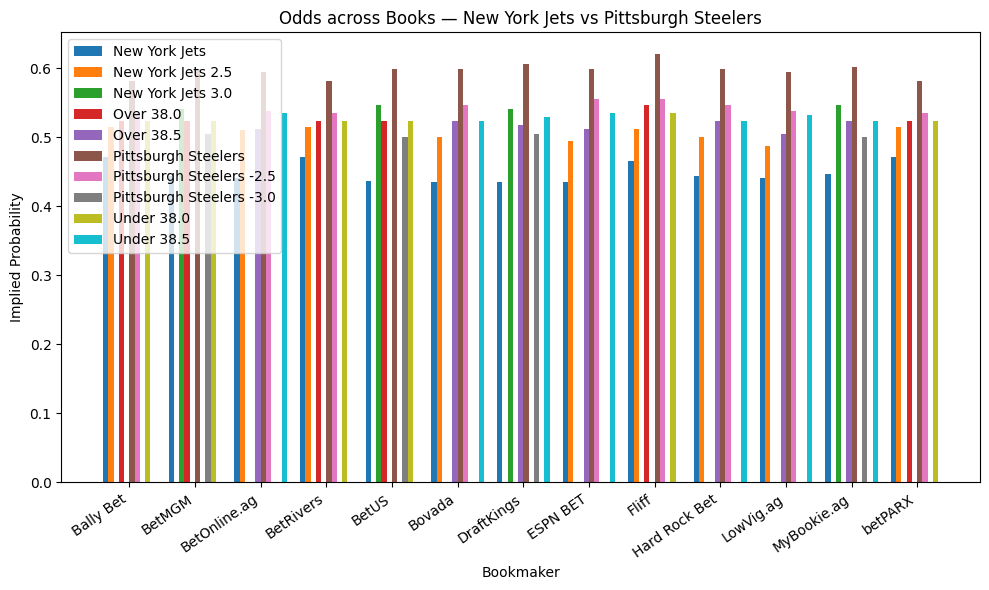

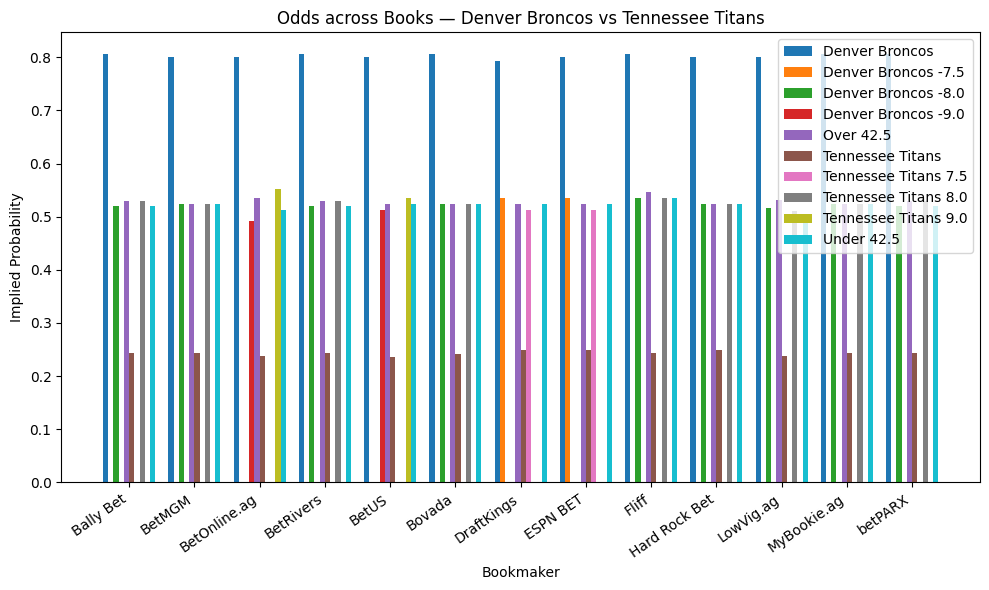

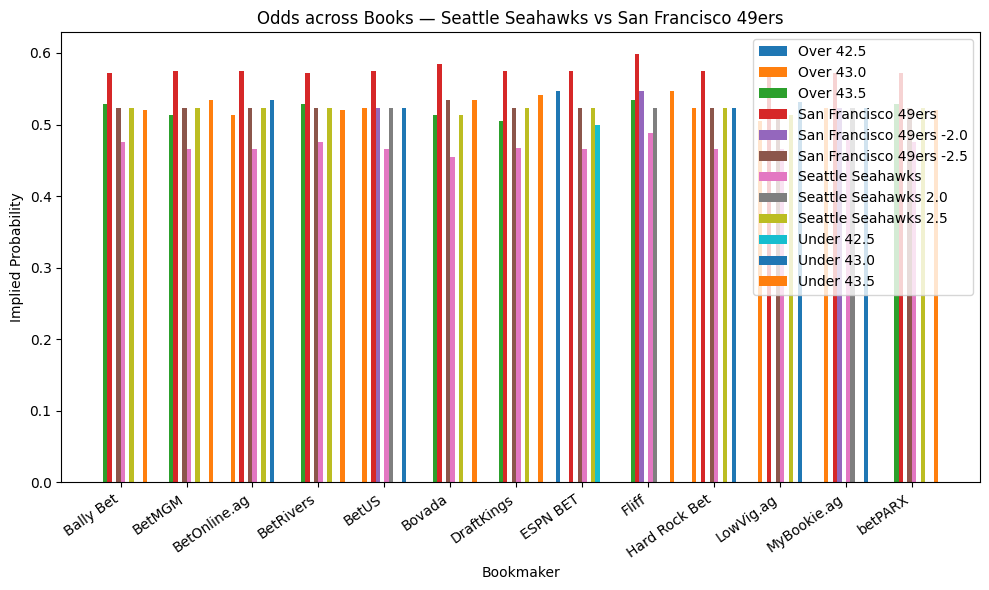

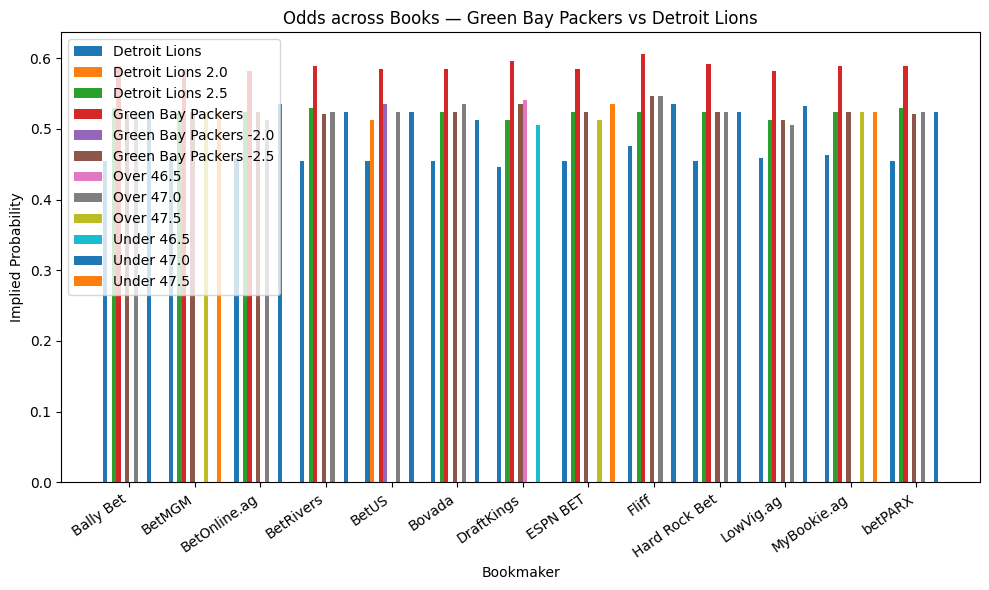

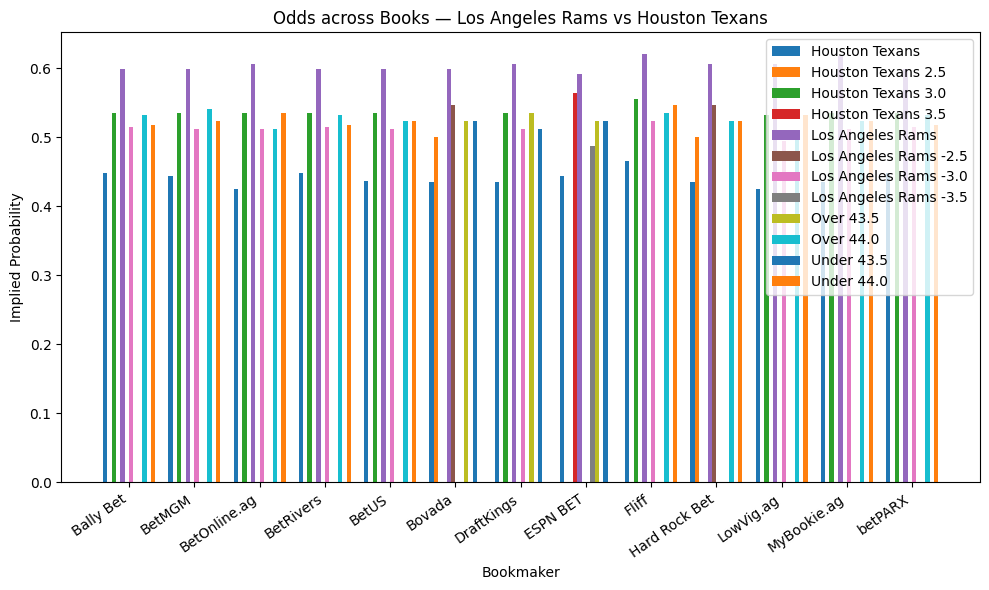

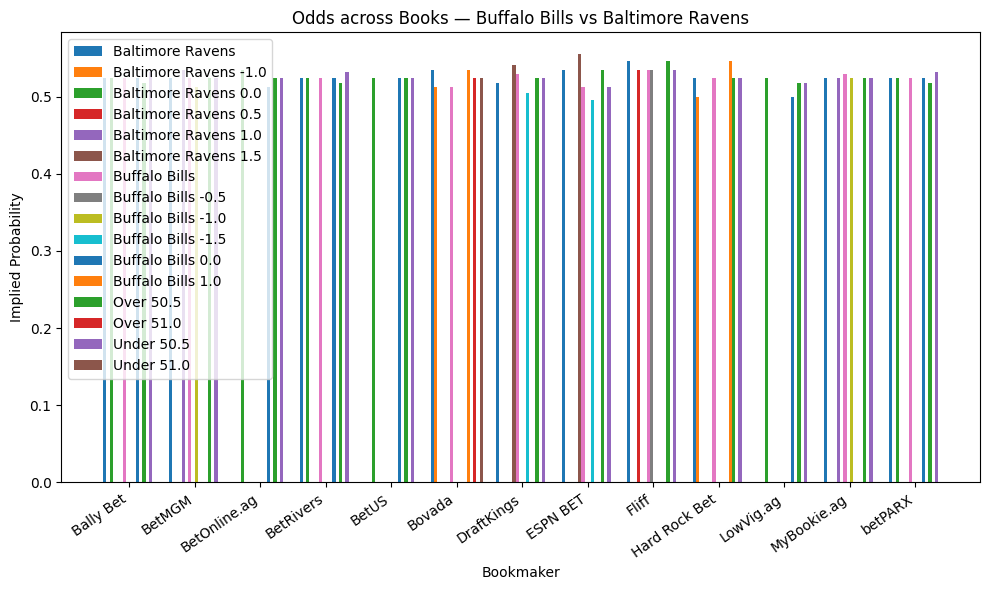

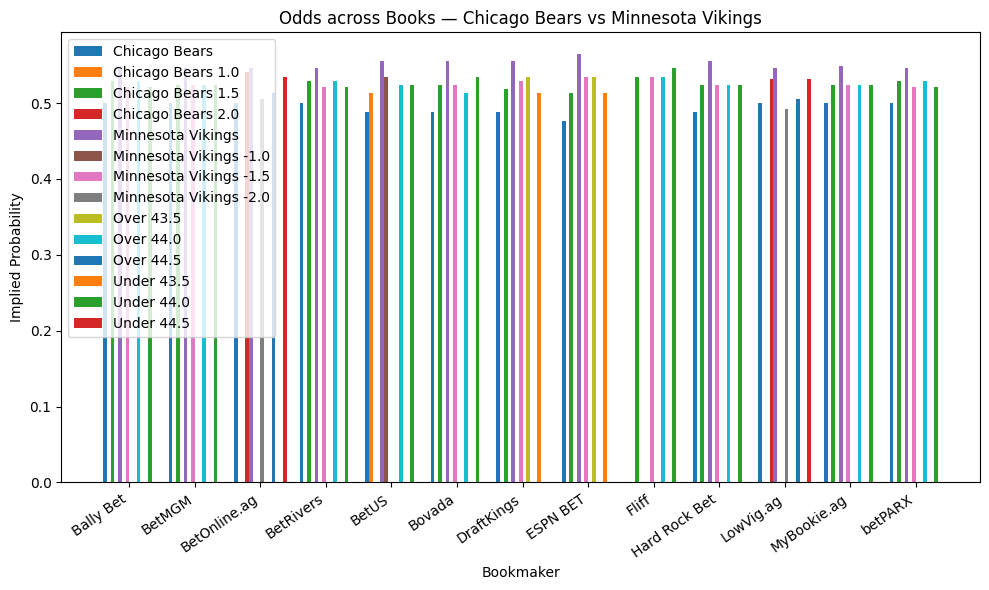

In [101]:
# Example: implied probabilities (0–1) for all games
plot_all_games_grouped(df, value_col="implied_prob")

In [102]:
# 3) Optional: "best price by team" table (useful for line shopping)
def best_prices(df: pd.DataFrame) -> pd.DataFrame:
    idx = df.groupby(["game", "team"])["decimal_odds"].idxmax()
    best = df.loc[idx, ["game", "team", "decimal_odds", "bookmaker"]].sort_values(["game","team"])
    best = best.rename(columns={"decimal_odds": "best_decimal", "bookmaker": "best_book"})
    return best.reset_index(drop=True)

best_prices(df)


game                        team  \
0     Atlanta Falcons vs Tampa Bay Buccaneers             Atlanta Falcons   
1     Atlanta Falcons vs Tampa Bay Buccaneers         Atlanta Falcons 1.5   
2     Atlanta Falcons vs Tampa Bay Buccaneers         Atlanta Falcons 2.0   
3     Atlanta Falcons vs Tampa Bay Buccaneers         Atlanta Falcons 2.5   
4     Atlanta Falcons vs Tampa Bay Buccaneers                   Over 47.0   
..                                        ...                         ...   
183  Washington Commanders vs New York Giants                  Under 46.0   
184  Washington Commanders vs New York Giants       Washington Commanders   
185  Washington Commanders vs New York Giants  Washington Commanders -5.0   
186  Washington Commanders vs New York Giants  Washington Commanders -5.5   
187  Washington Commanders vs New York Giants  Washington Commanders -6.0   

     best_decimal      best_book  
0            2.20      LowVig.ag  
1            1.95          BetUS  
2            1.91    MyBookie.ag  
3            1.95      LowVig.ag  
4            1.87      LowVig.ag  
..            ...            ...  
183          1.91    MyBookie.ag  
184          1.39      LowVig.ag  
185          1.87  Hard Rock Bet  
186          1.89     DraftKings  
187          2.00      LowVig.ag  

[188 rows x 4 columns]

In [103]:
# 4) Optional: quick market snapshot per game (favorite vs underdog, average prices)
def market_snapshot(df: pd.DataFrame) -> pd.DataFrame:
    # average decimal odds per team
    avg = (df.groupby(["game", "team", "market"])["decimal_odds"]
             .mean()
             .rename("avg_decimal")
             .reset_index())
    # favorite/underdog label within each game
    avg["rank"] = avg.groupby(["game", "market"])["avg_decimal"].rank(method="first")
    avg["role"] = avg.groupby(["game", "market"])["avg_decimal"].transform(lambda s: ["favorite" if x==s.min() else "underdog" for x in s])
    return avg.sort_values(["game","role","avg_decimal"]).reset_index(drop=True)

snap = market_snapshot(df)
snap


game                        team  \
0     Atlanta Falcons vs Tampa Bay Buccaneers        Tampa Bay Buccaneers   
1     Atlanta Falcons vs Tampa Bay Buccaneers                   Over 47.0   
2     Atlanta Falcons vs Tampa Bay Buccaneers   Tampa Bay Buccaneers -1.5   
3     Atlanta Falcons vs Tampa Bay Buccaneers                  Under 47.5   
4     Atlanta Falcons vs Tampa Bay Buccaneers         Atlanta Falcons 2.5   
..                                        ...                         ...   
183  Washington Commanders vs New York Giants                  Under 45.5   
184  Washington Commanders vs New York Giants  Washington Commanders -6.0   
185  Washington Commanders vs New York Giants         New York Giants 5.5   
186  Washington Commanders vs New York Giants         New York Giants 5.0   
187  Washington Commanders vs New York Giants             New York Giants   

      market  avg_decimal  rank      role  
0        h2h     1.729231   1.0  favorite  
1     totals     1.860000   1.0  favorite  
2    spreads     1.870000   1.0  favorite  
3     totals     1.895455   2.0  underdog  
4    spreads     1.900909   2.0  underdog  
..       ...          ...   ...       ...  
183   totals     1.913636   4.0  underdog  
184  spreads     1.914444   4.0  underdog  
185  spreads     1.943333   5.0  underdog  
186  spreads     1.950000   6.0  underdog  
187      h2h     3.160769   2.0  underdog  

[188 rows x 6 columns]

In [104]:
df = df.merge(snap, left_on=['game', 'team','market'], right_on=['game', 'team', 'market'], how='outer')
df

game             commence_time  \
0      Atlanta Falcons vs Tampa Bay Buccaneers 2025-09-07 17:00:00+00:00   
1      Atlanta Falcons vs Tampa Bay Buccaneers 2025-09-07 17:00:00+00:00   
2      Atlanta Falcons vs Tampa Bay Buccaneers 2025-09-07 17:00:00+00:00   
3      Atlanta Falcons vs Tampa Bay Buccaneers 2025-09-07 17:00:00+00:00   
4      Atlanta Falcons vs Tampa Bay Buccaneers 2025-09-07 17:00:00+00:00   
...                                        ...                       ...   
1229  Washington Commanders vs New York Giants 2025-09-07 17:00:00+00:00   
1230  Washington Commanders vs New York Giants 2025-09-07 17:00:00+00:00   
1231  Washington Commanders vs New York Giants 2025-09-07 17:00:00+00:00   
1232  Washington Commanders vs New York Giants 2025-09-07 17:00:00+00:00   
1233  Washington Commanders vs New York Giants 2025-09-07 17:00:00+00:00   

         bookmaker                        team  decimal_odds  implied_prob  \
0       DraftKings             Atlanta Falcons          2.14      0.467290   
1        LowVig.ag             Atlanta Falcons          2.20      0.454545   
2     BetOnline.ag             Atlanta Falcons          2.20      0.454545   
3         ESPN BET             Atlanta Falcons          2.15      0.465116   
4      MyBookie.ag             Atlanta Falcons          2.14      0.467290   
...            ...                         ...           ...           ...   
1229       betPARX  Washington Commanders -6.0          1.88      0.531915   
1230     Bally Bet  Washington Commanders -6.0          1.88      0.531915   
1231        BetMGM  Washington Commanders -6.0          1.91      0.523560   
1232         BetUS  Washington Commanders -6.0          1.91      0.523560   
1233         Fliff  Washington Commanders -6.0          1.87      0.534759   

       market  avg_decimal  rank      role  
0         h2h     2.146923   2.0  underdog  
1         h2h     2.146923   2.0  underdog  
2         h2h     2.146923   2.0  underdog  
3         h2h     2.146923   2.0  underdog  
4         h2h     2.146923   2.0  underdog  
...       ...          ...   ...       ...  
1229  spreads     1.914444   4.0  underdog  
1230  spreads     1.914444   4.0  underdog  
1231  spreads     1.914444   4.0  underdog  
1232  spreads     1.914444   4.0  underdog  
1233  spreads     1.914444   4.0  underdog  

[1234 rows x 10 columns]

In [105]:
dk_games = df.loc[df['bookmaker']=='DraftKings', 'game'].unique()
dk_games

array(['Atlanta Falcons vs Tampa Bay Buccaneers',
       'Buffalo Bills vs Baltimore Ravens',
       'Chicago Bears vs Minnesota Vikings',
       'Cleveland Browns vs Cincinnati Bengals',
       'Denver Broncos vs Tennessee Titans',
       'Green Bay Packers vs Detroit Lions',
       'Indianapolis Colts vs Miami Dolphins',
       'Jacksonville Jaguars vs Carolina Panthers',
       'Los Angeles Chargers vs Kansas City Chiefs',
       'Los Angeles Rams vs Houston Texans',
       'New England Patriots vs Las Vegas Raiders',
       'New Orleans Saints vs Arizona Cardinals',
       'New York Jets vs Pittsburgh Steelers',
       'Philadelphia Eagles vs Dallas Cowboys',
       'Seattle Seahawks vs San Francisco 49ers',
       'Washington Commanders vs New York Giants'], dtype=object)

In [106]:
target_df = df.loc[df['game'].isin(dk_games)]

In [117]:
df2 = target_df.loc[target_df['rank']==1.0]

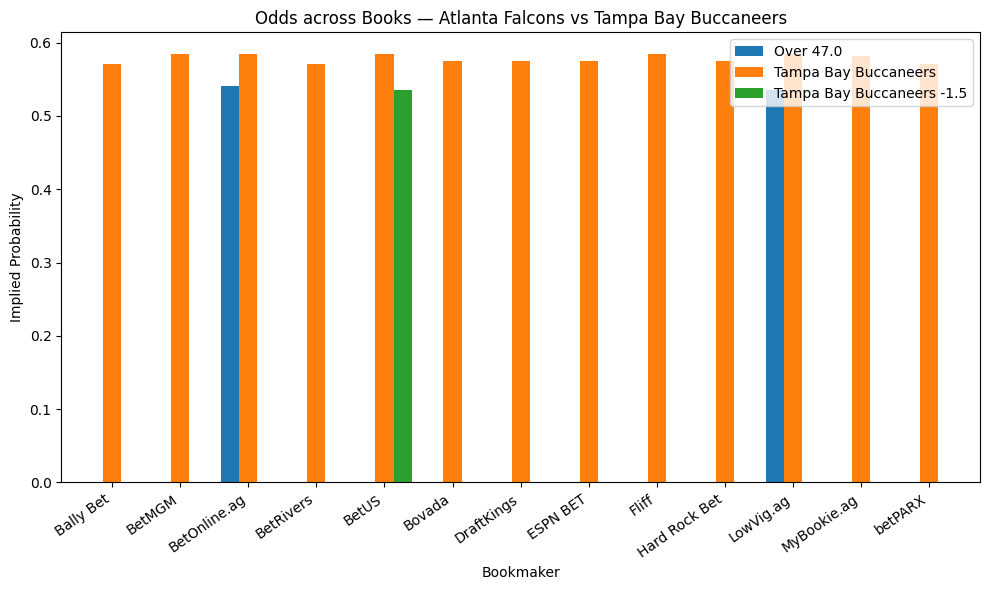

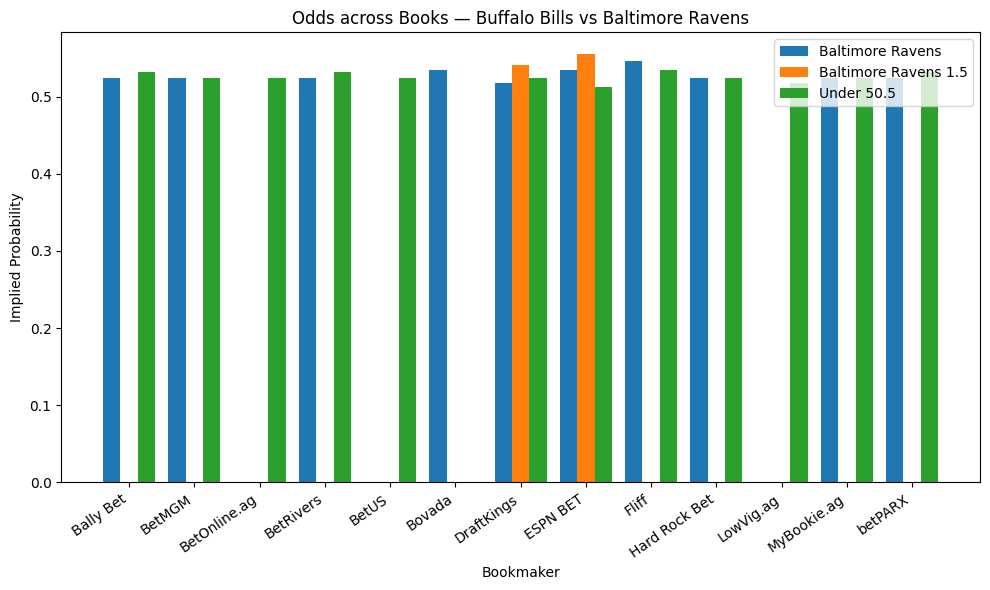

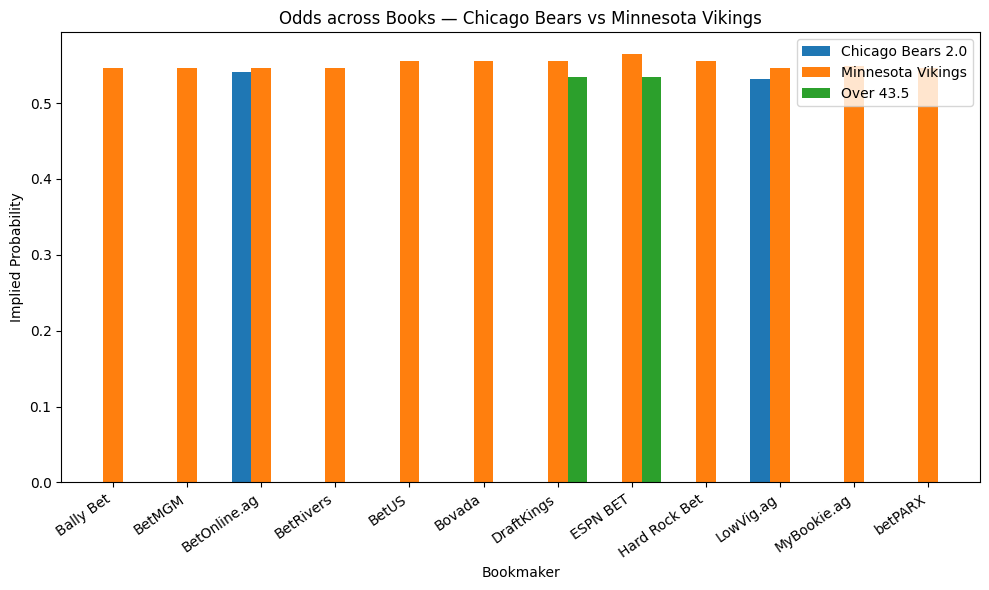

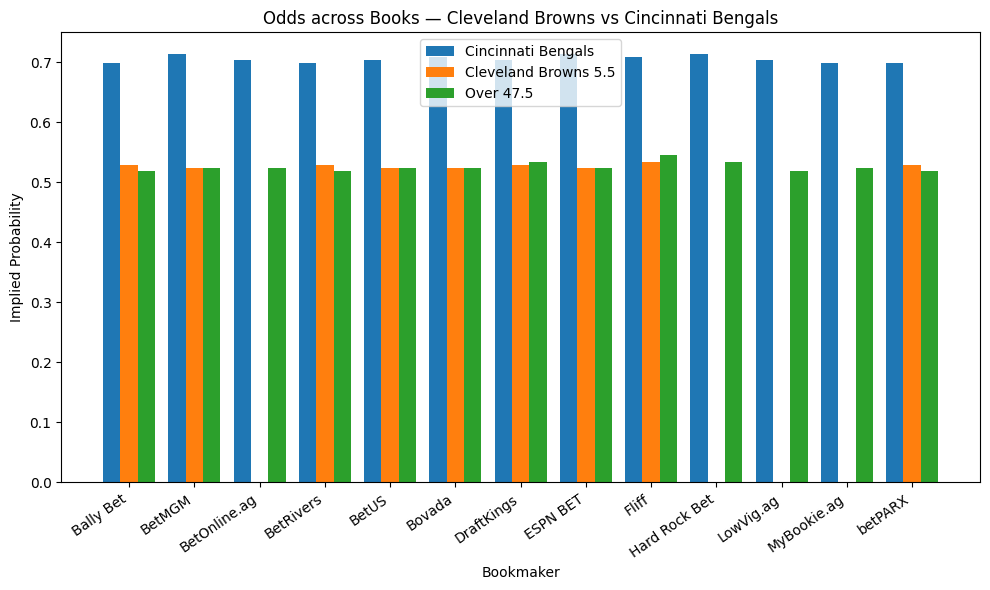

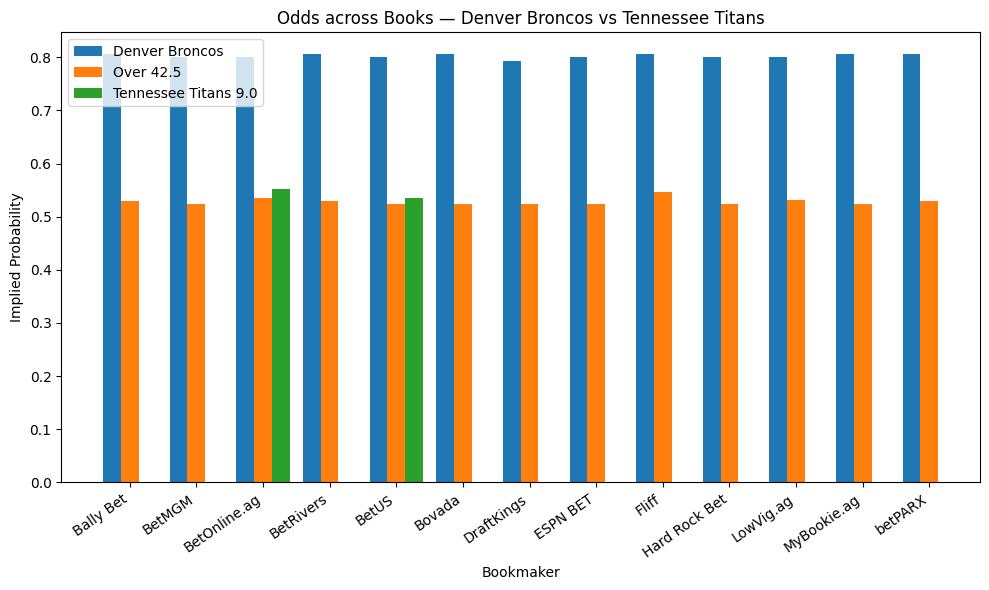

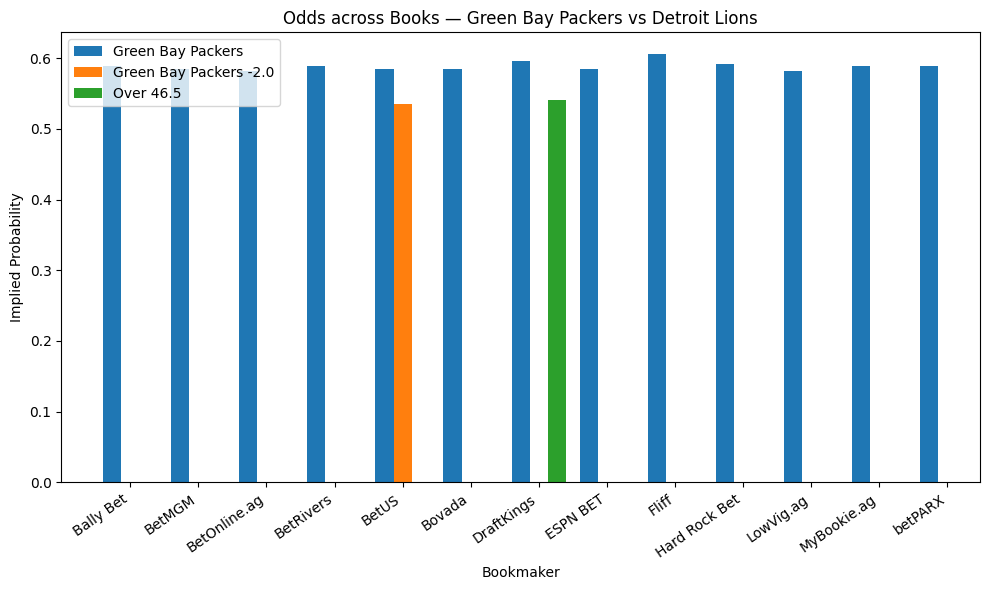

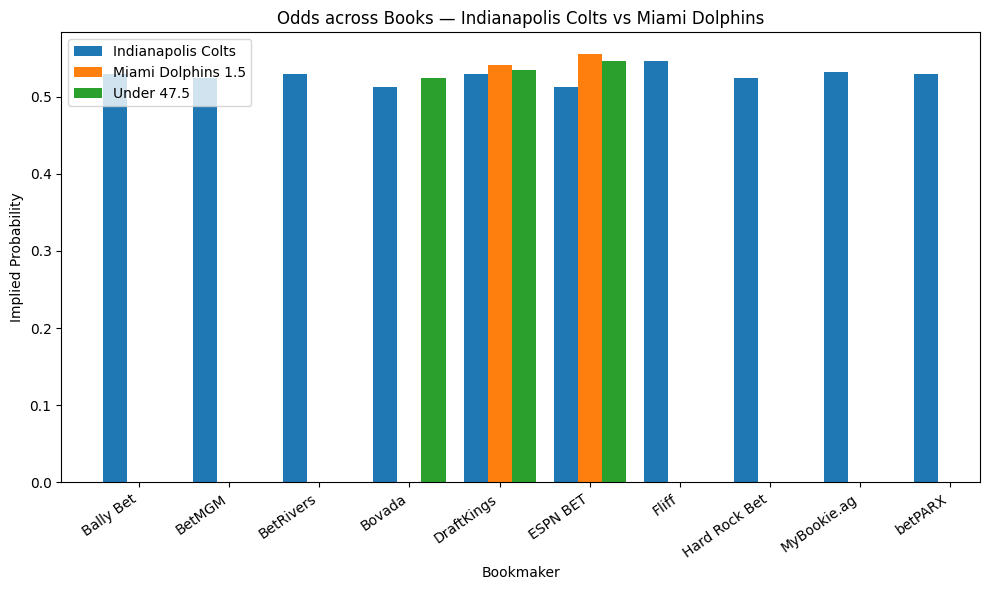

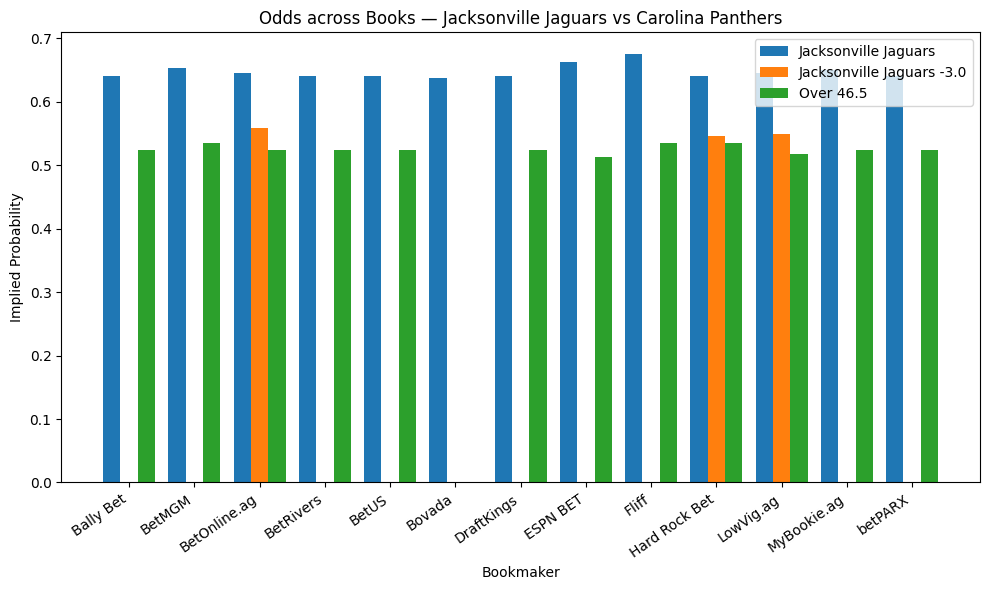

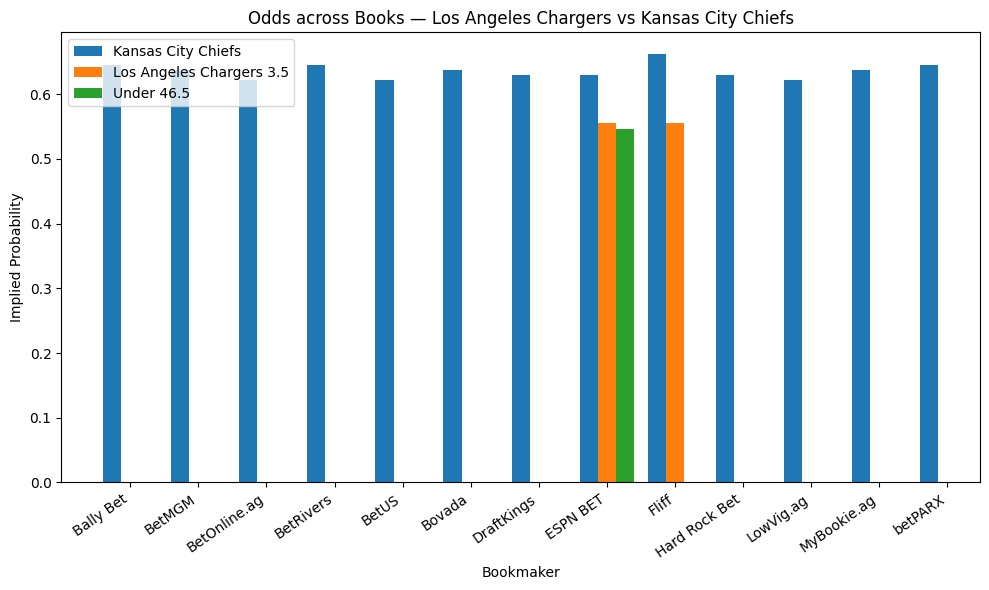

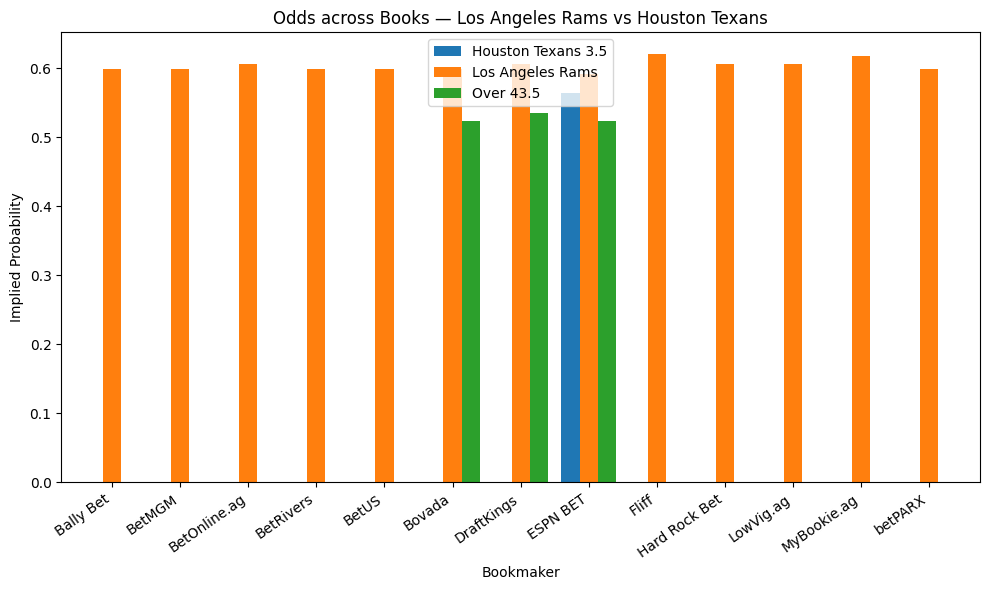

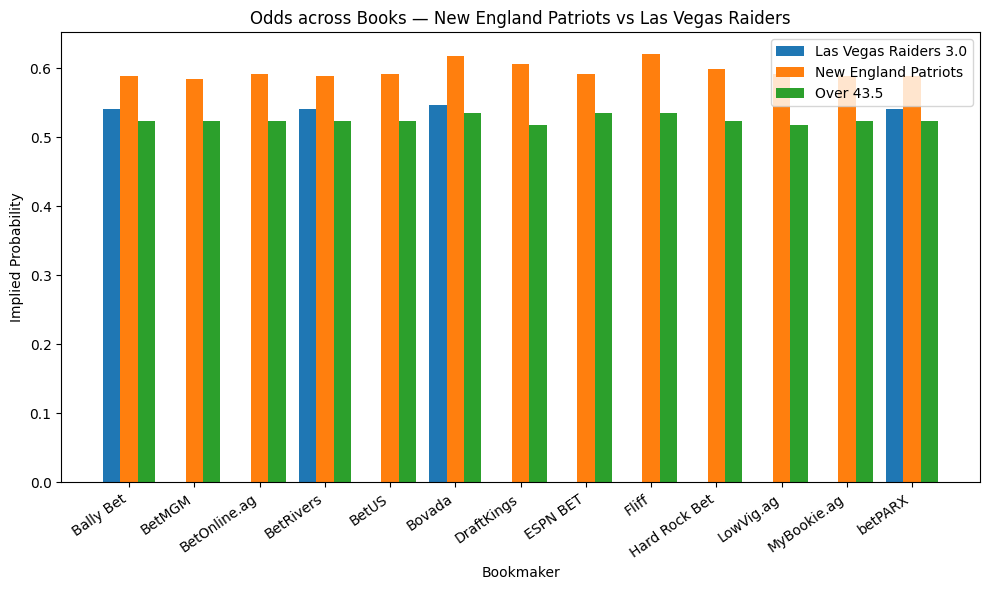

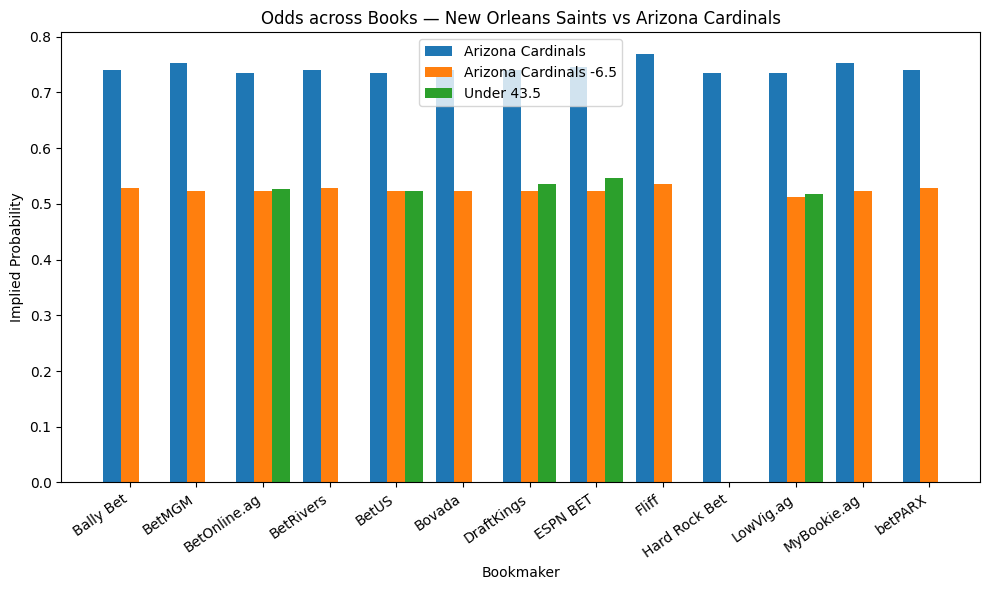

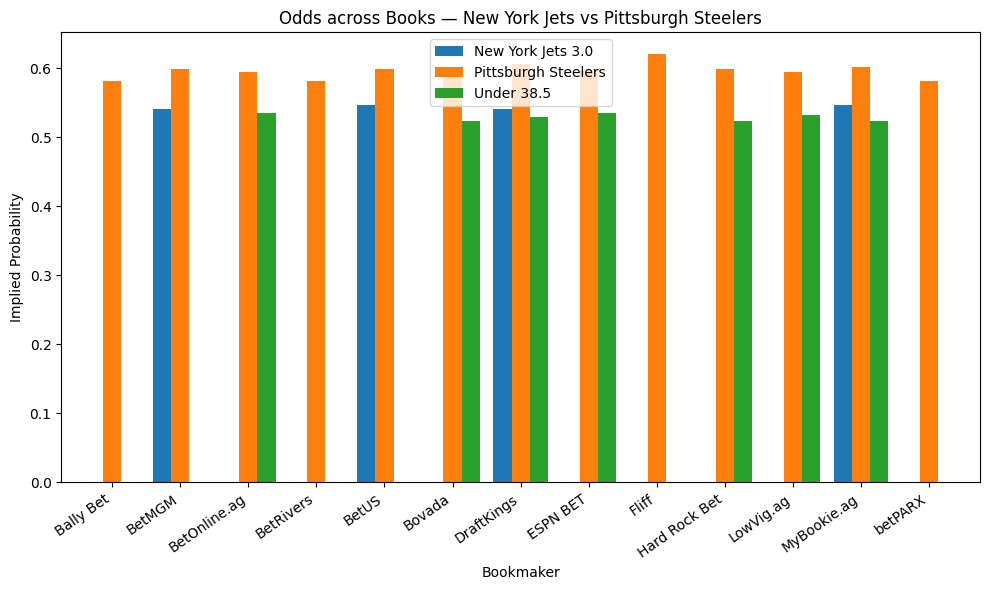

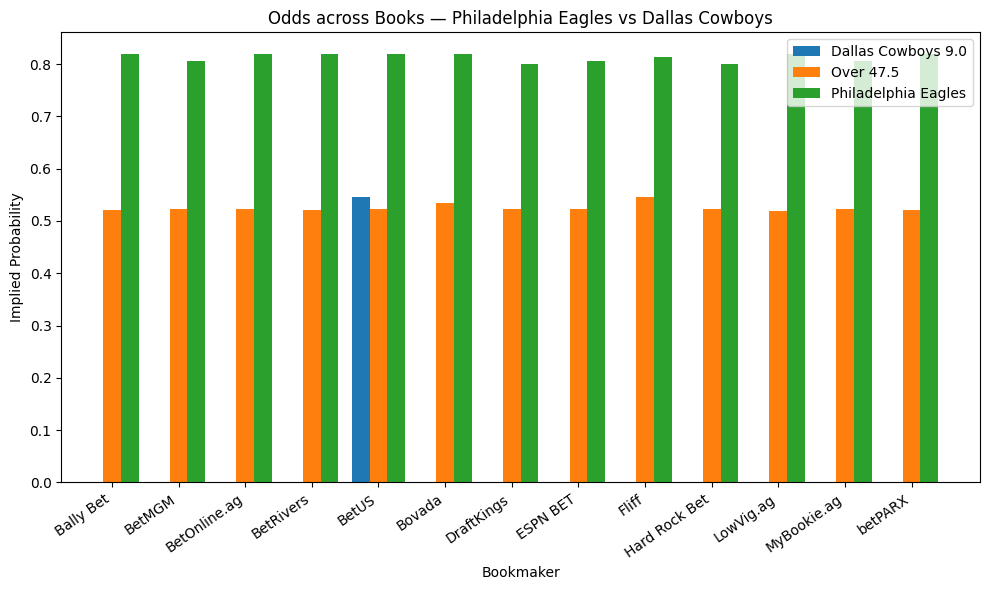

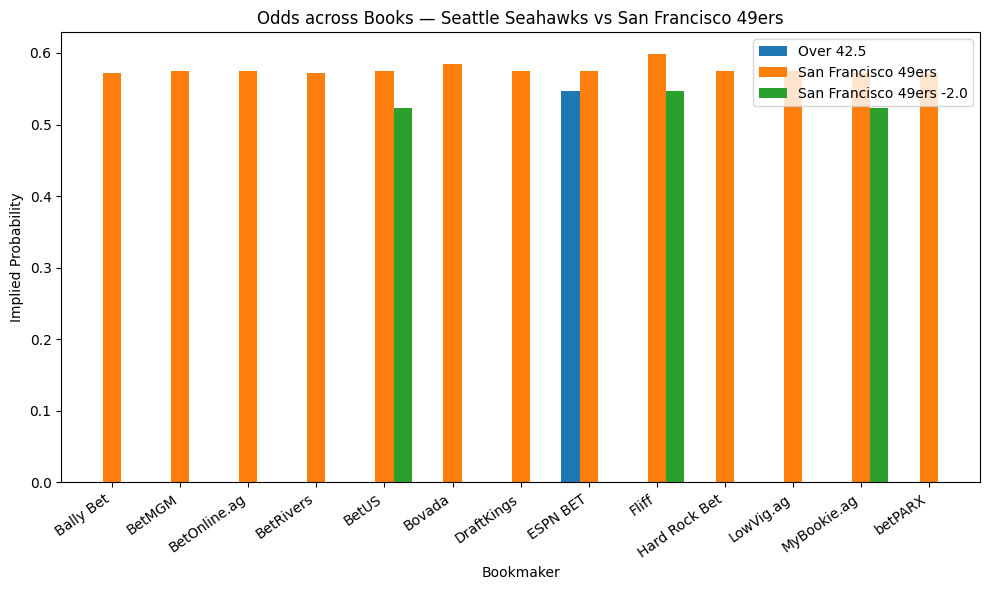

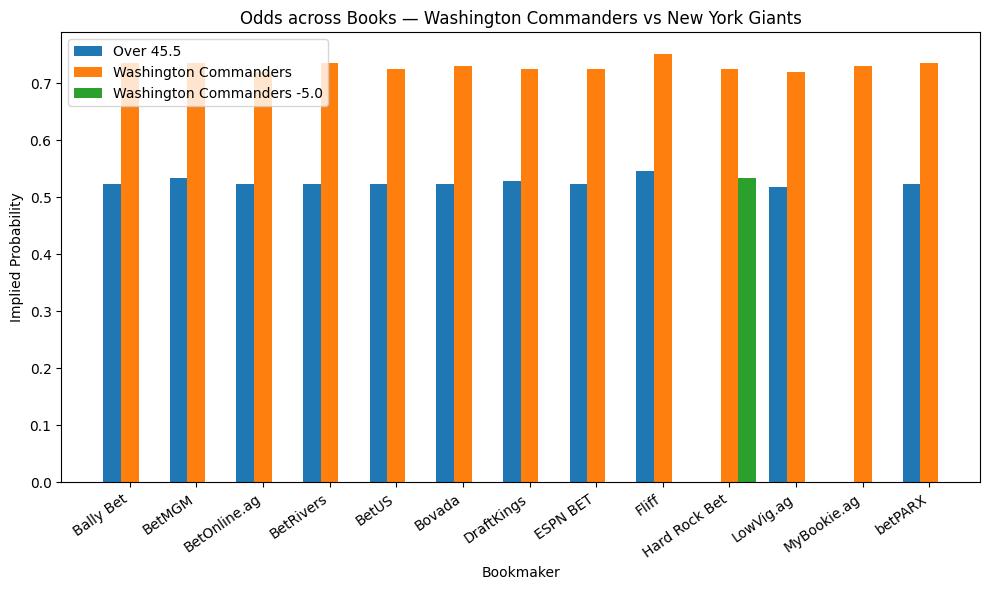

In [118]:
plot_all_games_grouped(df2, value_col="implied_prob")

In [119]:
df2['league'] = t_sport_keys[league_index]
df2.to_csv(f'./odds_data/{today_str}_{t_sport_keys[league_index]}.csv',index=False)

C:\Users\Max\AppData\Local\Temp\ipykernel_8028\58621993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['league'] = t_sport_keys[league_index]


In [120]:
df2.to_clipboard()

In [110]:
r2.headers['X-Requests-Used']

'24'